# Project 2 Machine Learning

Data in the real world is messy. Dealing with messy data sets is painful and burns through time which could be spent analysing the data itself.

This dataset contains historic work order text data for different divisions.  The data is generated using queries in a relational database and exported as csv files.  Some data are scrambled.  

USPS Suffix data is fromhttps://pe.usps.com/text/pub28/28apc_002.htm

In [1082]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter 

import re
import ftfy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

from sklearn.feature_extraction.text import TfidfVectorizer

In [1083]:
def cleanse_str(string): 
    string = ftfy.fix_text(string) # fix text encoding issues
    string = string.encode("ascii", errors="ignore").decode() #remove non ascii chars
    string = string.lower() #make lower case
    chars_to_remove = ["#", "@", ")","(",".","|","[","]","{","}","'"]
    rx = '[' + re.escape(''.join(chars_to_remove)) + ']'
    string = re.sub(rx, '', string) #remove the list of chars defined above
    string = string.replace('&', 'and')
    string = string.replace(',', ' ')
    string = string.replace('`', ' ')
    #string = string.replace('unknown', ' ')
    string = string.replace('-', ' ')
    string = string.replace('+', ' and ')
    #string = string.title() # normalise case - capital at start of each word
    string = re.sub(' +',' ',string).strip() # get rid of multiple spaces and replace with a single space
    string = ' '+ string +' ' # pad names for ngrams...
    string = re.sub(r'[,-./]|\sBD',r'', string)

    return string

In [1084]:
def cleanse_addr_suffix (string): 
    
    string = re.sub(r'[0-9]+', '', string)
    
    return string

In [1085]:
def standardize_addr_suffix (string):
    
    string = string + ' '
    
    #string = cleanse_addr_suffix(string)
    
    string = re.sub(' aly ', ' alley ', string)
    string = re.sub(' annex ', ' anex ', string)
    string = re.sub(' anx ', ' anex ', string)
    string = re.sub(' ave ', ' avenue ', string)
    string = re.sub(' av ', ' avenue ', string)
    string = re.sub(' aven ', ' avenue ', string)
    string = re.sub(' bch ', ' beach ', string)
    string = re.sub(' bnd ', ' bend ', string)
    string = re.sub(' blf ', ' bluff ', string)
    string = re.sub(' btm ', ' bottom ', string)
    string = re.sub(' blvd ', ' boulevard ', string)
    string = re.sub(' br ', ' branch ', string)
    string = re.sub(' brg ', ' bridge ', string)
    string = re.sub(' brk ', ' brook ', string)
    string = re.sub(' byp ', ' bypass ', string)
    string = re.sub(' bypas ', ' bypass ', string)
    string = re.sub(' cp ', ' camp ', string)
    string = re.sub(' cent ', ' center ', string)
    string = re.sub(' centre ', ' center ', string)
    string = re.sub(' cntr ', ' center ', string)
    string = re.sub(' centr ', ' center ', string)
    string = re.sub(' ctr ', ' center ', string)
    string = re.sub(' circl ', ' circle ', string)
    string = re.sub(' cir ', ' circle ', string)
    string = re.sub(' cor ', ' corner ', string)
    string = re.sub(' cors ', ' corners ', string)
    string = re.sub(' crse ', ' course ', string)
    string = re.sub(' ct ', ' court ', string)
    string = re.sub(' cts ', ' courts ', string)
    string = re.sub(' cv ', ' cove ', string)
    string = re.sub(' crk ', ' creek ', string)
    string = re.sub(' cres ', ' crescent ', string)
    string = re.sub(' div ', ' divide ', string)
    string = re.sub(' dr ', ' drive ', string)
    string = re.sub(' drv ', ' drive ', string)
    string = re.sub(' drives ', ' drives  ', string)
    string = re.sub(' est ', ' estate ', string)
    string = re.sub(' ests ', ' estates ', string)
    string = re.sub(' express ', ' expressway ', string)
    string = re.sub(' ext ', ' extension ', string)
    string = re.sub(' fry ', ' ferry ', string)
    string = re.sub(' fld ', ' field ', string)
    string = re.sub(' frd ', ' ford ', string)
    string = re.sub(' frst ', ' forest ', string)
    string = re.sub(' forg ', ' forge ', string)
    string = re.sub(' frk ', ' fork ', string)
    string = re.sub(' ft ', ' fort ', string)
    string = re.sub(' gdns ', ' gardens ', string)
    string = re.sub(' grdns ', ' gardens ', string)
    string = re.sub(' gatewy ', ' gateway ', string)
    string = re.sub(' gln ', ' glen ', string)
    string = re.sub(' grn ', ' green ', string)
    string = re.sub(' grov ', ' grove ', string)
    string = re.sub(' grv ', ' grove ', string)
    string = re.sub(' harbr ', ' harbor ', string)
    string = re.sub(' hvn ', ' haven ', string)
    string = re.sub(' hts ', ' heights ', string)
    string = re.sub(' ht ', ' heights ', string)
    string = re.sub(' hwy ', ' highway ', string)
    string = re.sub(' hway ', ' highway ', string)
    string = re.sub(' hiway ', ' highway ', string)
    string = re.sub(' hl ', ' hill ', string)
    string = re.sub(' hls ', ' hills ', string)
    string = re.sub(' holw ', ' hollow ', string)
    string = re.sub(' is ', ' island ', string)
    string = re.sub(' jct ', ' junction ', string)
    string = re.sub(' knl ', ' knoll ', string)
    string = re.sub(' knls ', ' knolls ', string)
    string = re.sub(' lk ', ' lake ', string)
    string = re.sub(' lks ', ' lakes ', string)
    string = re.sub(' lndg ', ' landing ', string)
    string = re.sub(' ln ', ' lane ', string)
    string = re.sub(' lf ', ' loaf ', string)
    string = re.sub(' lodg ', ' lodge ', string)
    string = re.sub(' ldg ', ' lodge ', string)
    string = re.sub(' mnr ', ' manor ', string)
    string = re.sub(' mdw ', ' meadows ', string)
    string = re.sub(' mdws ', ' meadows ', string)
    string = re.sub(' mnt ', ' mount ', string)
    string = re.sub(' mt ', ' mount ', string)
    string = re.sub(' mtn ', ' mountain ', string)
    string = re.sub(' orch ', ' orchard ', string)
    string = re.sub(' prk ', ' park ', string)
    string = re.sub(' pky ', ' parkway ', string)
    string = re.sub(' pkwy ', ' parkway ', string)
    string = re.sub(' pl ', ' place ', string)
    string = re.sub(' pln ', ' plain ', string)
    string = re.sub(' plns ', ' plains ', string)
    string = re.sub(' plz ', ' plaza ', string)
    string = re.sub(' pt ', ' point ', string)
    string = re.sub(' pts ', ' points ', string)
    string = re.sub(' pr ', ' prairie ', string)
    string = re.sub(' rst ', ' rest ', string)
    string = re.sub(' rdge ', ' ridge ', string)
    string = re.sub(' rdg ', ' ridge ', string)
    string = re.sub(' rvr ', ' river ', string)
    string = re.sub(' rd ', ' road ', string)
    string = re.sub(' rds ', ' roads ', string)
    string = re.sub(' shr ', ' shore ', string)
    string = re.sub(' spg ', ' spring ', string)
    string = re.sub(' spgs ', ' springs ', string)
    string = re.sub(' sq ', ' square ', string)
    string = re.sub(' stn ', ' station ', string)
    string = re.sub(' sta ', ' station ', string)
    string = re.sub(' str ', ' street ', string)
    string = re.sub(' st ', ' street ', string)
    string = re.sub(' ter ', ' terrace ', string)
    string = re.sub(' terr ', ' terrace ', string)
    string = re.sub(' trce ', ' trace ', string)
    string = re.sub(' tracks ', ' track ', string)
    string = re.sub(' trak ', ' track ', string)
    string = re.sub(' trails ', ' trail ', string)
    string = re.sub(' trl ', ' trail ', string)
    string = re.sub(' trlr ', ' trailer ', string)
    string = re.sub(' un ', ' union ', string)
    string = re.sub(' vly ', ' valley ', string)
    string = re.sub(' vally ', ' valley ', string)
    string = re.sub(' vw ', ' view ', string)
    string = re.sub(' villiage ', ' village ', string)
    string = re.sub(' vill ', ' village ', string)
    string = re.sub(' vlg ', ' village ', string)
    string = re.sub(' vl ', ' ville ', string)
    string = re.sub(' vis ', ' vista ', string)
    string = re.sub(' wy ', ' way ', string)


    return string

In [1086]:
def get_word_list (list_of_string):
    split_words = []
    
    for value in list_of_string:#.iteritems():
        split_word = value.split()
        split_words.extend(split_word)
        
    return split_words

In [1087]:
# load data
file_path = 'local_directory'

df_match = pd.read_csv(file_path + 'addr_match.csv')
df_exception = pd.read_csv(file_path + 'addr_exception.csv')

df_raw_sum = pd.read_csv(file_path + 'addr_raw_sum.csv')
df_match_1_n = pd.read_csv(file_path + 'addr_match_1_n.csv')

In [1088]:
df_master = pd.read_csv(file_path + 'addr_master.csv')

In [1089]:
df_usps_suffix = df=pd.read_csv(file_path + 'usps_suffix.csv')

In [1090]:
#df=pd.read_csv(file_path + 'Sample_Data_WOAddr_messy.csv')

In [1091]:
df_usps_suffix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 3 columns):
Primary_Suffix    515 non-null object
Comm_suffix       515 non-null object
Std_suffix        515 non-null object
dtypes: object(3)
memory usage: 12.1+ KB


In [1092]:
df_usps_suffix['Primary_Suffix'] = df_usps_suffix['Primary_Suffix'].str.lower()
df_usps_suffix['Comm_suffix'] = df_usps_suffix['Comm_suffix'].str.lower()
df_usps_suffix['Std_suffix'] = df_usps_suffix['Std_suffix'].str.lower()

In [1093]:
df_usps_suffix.head()

,Primary_Suffix,Comm_suffix,Std_suffix
0,alley,allee,aly
1,alley,alley,aly
2,alley,ally,aly
3,alley,aly,aly
4,anex,anex,anx


In [1094]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505767 entries, 0 to 505766
Data columns (total 3 columns):
P_DIV_CD    505767 non-null object
P_ADDR      505761 non-null object
P_CITY      505767 non-null object
dtypes: object(3)
memory usage: 11.6+ MB


In [1095]:
df_master.dropna(inplace=True)

In [1096]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505761 entries, 0 to 505766
Data columns (total 3 columns):
P_DIV_CD    505761 non-null object
P_ADDR      505761 non-null object
P_CITY      505761 non-null object
dtypes: object(3)
memory usage: 15.4+ MB


In [1097]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
DATAID         30000 non-null int64
M_TXT          30000 non-null object
M_DIV_CD       30000 non-null object
M_ADDR         30000 non-null object
M_CITY         30000 non-null object
M_ADDR_TYPE    30000 non-null object
P_ID           30000 non-null int64
P_ADDR         30000 non-null object
P_CITY         30000 non-null object
MATCHCODE      30000 non-null object
dtypes: int64(2), object(8)
memory usage: 2.3+ MB


In [1098]:
df_exception.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530437 entries, 0 to 530436
Data columns (total 6 columns):
DATAID         530437 non-null object
M_TXT          530437 non-null object
M_DIV_CD       530437 non-null object
M_ADDR         526190 non-null object
M_CITY         530320 non-null object
M_ADDR_TYPE    530401 non-null object
dtypes: object(6)
memory usage: 24.3+ MB


In [1099]:
# handle NULL fields
df_exception.dropna(inplace=True)
'''
df_exception['M_ADDR'].fillna(df_exception['M_TXT'], inplace=True)
df_exception['M_ADDR_TYPE'].fillna('Unknown', inplace=True)
df_exception['M_CITY'].fillna('Unknown', inplace=True)
'''

"\ndf_exception['M_ADDR'].fillna(df_exception['M_TXT'], inplace=True)\ndf_exception['M_ADDR_TYPE'].fillna('Unknown', inplace=True)\ndf_exception['M_CITY'].fillna('Unknown', inplace=True)\n"

In [1100]:
df_exception.M_ADDR_TYPE.unique()

array(['SIMPLE', 'LOT', 'ROUTE', 'RANGE', 'NOTDEFINED', 'BLOCK', 'BLANK',
       'MULTI'], dtype=object)

In [1101]:
# cleanse text
print('Start text cleansing ...')
t1 = time.time()

df_match['M_ADDR_c'] = df_match['M_ADDR'].apply(cleanse_str)
df_match['P_ADDR_c'] = df_match['P_ADDR'].apply(cleanse_str)
df_match['M_TXT_c'] = df_match['M_TXT'].apply(cleanse_str)
df_exception['M_ADDR_c'] = df_exception['M_ADDR'].apply(cleanse_str)
df_exception['M_TXT_c'] = df_exception['M_TXT'].apply(cleanse_str)

df_match['M_CITY'] = df_match['M_CITY'].str.lower()
df_match['P_CITY'] = df_match['P_CITY'].str.lower()
df_exception['M_CITY'] = df_exception['M_CITY'].str.lower()

t = time.time() - t1
print("SELFTIMED:", t)

Start text cleansing ...
SELFTIMED: 58.14395713806152


In [1102]:
# some address columns only contain number.  

df_exception['M_ADDR_n'] = df_exception['M_ADDR_c'].str.replace(' ', '')
df_exception['ADDR_isnumeric']=df_exception.M_ADDR_n.str.isnumeric()
# Store numeric address to a seperate dataframe
df_exception_numeric = df_exception[df_exception.ADDR_isnumeric==True]
# Exlude numeric addresses from data set 
df_exception = df_exception[df_exception.ADDR_isnumeric==False]

In [1103]:
df_exception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525887 entries, 0 to 530436
Data columns (total 10 columns):
DATAID            525887 non-null object
M_TXT             525887 non-null object
M_DIV_CD          525887 non-null object
M_ADDR            525887 non-null object
M_CITY            525887 non-null object
M_ADDR_TYPE       525887 non-null object
M_ADDR_c          525887 non-null object
M_TXT_c           525887 non-null object
M_ADDR_n          525887 non-null object
ADDR_isnumeric    525887 non-null bool
dtypes: bool(1), object(9)
memory usage: 40.6+ MB


In [1104]:
print('Start master data set text cleansing ...')
time1 = time.time()

df_master['P_ADDR_c'] = df_master['P_ADDR'].apply(cleanse_str)
df_master['P_CITY_c'] = df_master['P_CITY'].apply(cleanse_str)

t = time.time() - t1
print("SELFTIMED:", t)

Start master data set text cleansing ...
SELFTIMED: 94.92632150650024


In [1105]:
#df_master.head()

In [1106]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
DATAID         30000 non-null int64
M_TXT          30000 non-null object
M_DIV_CD       30000 non-null object
M_ADDR         30000 non-null object
M_CITY         30000 non-null object
M_ADDR_TYPE    30000 non-null object
P_ID           30000 non-null int64
P_ADDR         30000 non-null object
P_CITY         30000 non-null object
MATCHCODE      30000 non-null object
M_ADDR_c       30000 non-null object
P_ADDR_c       30000 non-null object
M_TXT_c        30000 non-null object
dtypes: int64(2), object(11)
memory usage: 3.0+ MB


In [1107]:
df_exception_s= df_exception[df_exception.M_ADDR_TYPE=='SIMPLE']
df_exception_s[df_exception_s.M_DIV_CD=='d6'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12158 entries, 8649 to 530435
Data columns (total 10 columns):
DATAID            12158 non-null object
M_TXT             12158 non-null object
M_DIV_CD          12158 non-null object
M_ADDR            12158 non-null object
M_CITY            12158 non-null object
M_ADDR_TYPE       12158 non-null object
M_ADDR_c          12158 non-null object
M_TXT_c           12158 non-null object
M_ADDR_n          12158 non-null object
ADDR_isnumeric    12158 non-null bool
dtypes: bool(1), object(9)
memory usage: 961.7+ KB


## EDA

### Analyze address suffix frenquency and format 

Will use collection Counter to count possible suffix used by address data sets

In [1108]:
# find the most frenqucent words - find out address suffix
from collections import Counter 

print('start ...')

t1=time.time()

df_list_m= df_match['M_ADDR_c']#.apply(cleanse_addr_suffix)

t = time.time() - t1
print('Removed number from string.  Time used ', t)
  
# split() returns list of all the words in the string 
split_it_m = get_word_list(df_list_m)
  
t = time.time() - t1
print('Split into words.  Time used ', t)

# Pass the split_it list to instance of Counter class. 
Counter_m = Counter(split_it_m) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur_m = Counter_m.most_common(50) 
  
#print(most_occur_m) 

t = time.time() - t1
print('Completed in ', t)

start ...
Removed number from string.  Time used  0.13886809349060059
Split into words.  Time used  0.16995024681091309
Completed in  0.20203614234924316


In [1109]:
# find the most frenqucent words - find out address suffix
from collections import Counter 

print('start ...')

t1=time.time()

df_list1 = df_exception['M_ADDR_c']#.apply(cleanse_addr_suffix)

t = time.time() - t1
print('Removed number from string.  Time used ', t)
  
# split() returns list of all the words in the string 
split_it1 = get_word_list(df_list1)
  
t = time.time() - t1
print('Split into words.  Time used ', t)

# Pass the split_it list to instance of Counter class. 
Counter1 = Counter(split_it1) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur1 = Counter1.most_common(50) 
  
#print(most_occur1) 

t = time.time() - t1
print('Completed in ', t)

start ...
Removed number from string.  Time used  0.12282514572143555
Split into words.  Time used  0.6742870807647705
Completed in  1.1234793663024902


In [1110]:
# find the most frenqucent words - find out address suffix
from collections import Counter 

print('start ...')

t1=time.time()

df_list2= df_master['P_ADDR_c']#.apply(cleanse_addr_suffix)

t = time.time() - t1
print('Removed number from string.  Time used ', t)
  
# split() returns list of all the words in the string 
split_it2 = get_word_list(df_list2)
  
t = time.time() - t1
print('Split into words.  Time used ', t)

# Pass the split_it list to instance of Counter class. 
Counter2 = Counter(split_it2) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur2 = Counter2.most_common(50) 
  
#print(most_occur2) 

t = time.time() - t1
print('Completed in ', t)

start ...
Removed number from string.  Time used  0.027070283889770508
Split into words.  Time used  0.6587467193603516
Completed in  0.9219443798065186


In [1111]:
# convert Counter into Dataframe
df_match_counter = pd.DataFrame.from_dict(Counter_m, orient='index').reset_index()
df_match_counter.columns =  ['Word_Seg', 'cnt']

df_exception_counter = pd.DataFrame.from_dict(Counter1, orient='index').reset_index()
df_exception_counter.columns = ['Word_Seg', 'cnt'] 

df_master_counter = pd.DataFrame.from_dict(Counter2, orient='index').reset_index()
df_master_counter.columns = ['Word_Seg', 'cnt']

In [1112]:
df_exception_counter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34004 entries, 0 to 34003
Data columns (total 2 columns):
Word_Seg    34004 non-null object
cnt         34004 non-null int64
dtypes: int64(1), object(1)
memory usage: 531.4+ KB


### Identify commonly used suffix

Join split words with commonly used suffix variances provided by USPS data set

In [1113]:
resultm = pd.merge(df_match_counter, df_usps_suffix, how='inner', left_on='Word_Seg', right_on='Comm_suffix')
result1 = pd.merge(df_exception_counter, df_usps_suffix, how='inner', left_on='Word_Seg', right_on='Comm_suffix')
result2 = pd.merge(df_master_counter, df_usps_suffix, how='inner', left_on='Word_Seg', right_on='Comm_suffix')

In [1114]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 5 columns):
Word_Seg          214 non-null object
cnt               214 non-null int64
Primary_Suffix    214 non-null object
Comm_suffix       214 non-null object
Std_suffix        214 non-null object
dtypes: int64(1), object(4)
memory usage: 10.0+ KB


In [1115]:
resultm.to_csv(file_path + 'suffix_resultm.csv')
result1.to_csv(file_path + 'suffix_result1.csv')
result2.to_csv(file_path + 'suffix_result2.csv')

In [1116]:
len(result1.Word_Seg.unique()), len(result2.Word_Seg.unique())#head()

(260, 214)

In [1117]:
result2[result2.Primary_Suffix=='place']

,Word_Seg,cnt,Primary_Suffix,Comm_suffix,Std_suffix
6,pl,13371,place,pl,pl
118,place,545,place,place,pl


In [1118]:
# get top 50 suffix used by address data sets
top50_rm = resultm.sort_values(['cnt'], ascending=False).head(50)
top50_r1 = result1.sort_values(['cnt'], ascending=False).head(50)
top50_r2 = result2.sort_values(['cnt'], ascending=False).head(50)

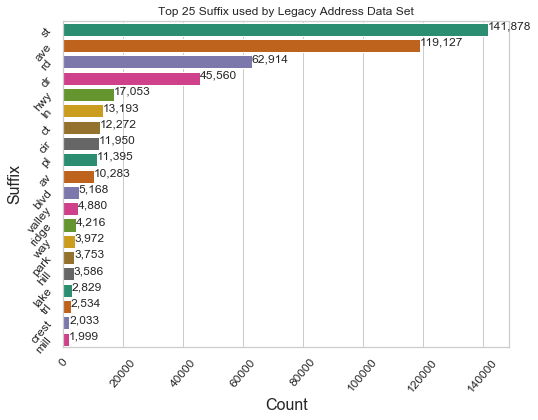

In [1119]:
# plot1 real 
N = 5
ind = np.arange(N)
width = 0.35

fig, ax= plt.subplots(figsize =(8,6))
sns.set_style('whitegrid')
sns.set_context('notebook')
#sns.set(font_scale=2)
plt.fontsize =(35)

ax=sns.barplot( palette="Dark2", ax=ax, x='cnt', y='Word_Seg', data=top50_r1.head(20))

for p in ax.patches:
    percentage ='{:,.0f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
#ax1=sns.barplot( palette="Dark2", ax=ax, x='Matched_Total', y='DIV_CD', data=df_stat_by_div)

    
plt.xticks(rotation =50,fontsize =12)
plt.yticks(rotation =50,fontsize =12)

plt.title('Top 25 Suffix used by Legacy Address Data Set',
         fontsize =12 
         )
plt.xlabel ('Count',fontsize = 16)
plt.ylabel ('Suffix',fontsize = 16)

plt.show ()

In [1120]:
# generate matrix for top 10 primary suffix which have multiple variances in legacy address data set
include = list(result1.groupby("Primary_Suffix").Word_Seg.count().sort_values(ascending=False).head(10).index)
df_m_suffix = result1.query('Primary_Suffix in @include').sort_values(['Primary_Suffix'], ascending=True)
df_m_suffix.groupby(['Primary_Suffix','Word_Seg']).size().unstack(fill_value=0)

Word_Seg,av,ave,aven,avenue,cent,center,centr,centre,cir,circl,...,ridge,st,sta,station,stn,str,street,ter,terr,terrace
Primary_Suffix,,,,,,,,,,,,,,,,,,,,,
avenue,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
center,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
circle,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
drive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
heights,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
highway,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ridge,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
station,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
street,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [1121]:
# one example shows that for 'center' , there are six variances 
df_m_suffix[df_m_suffix.Primary_Suffix=='center']

,Word_Seg,cnt,Primary_Suffix,Comm_suffix,Std_suffix
169,cntr,7,center,cntr,ctr
119,centre,14,center,centre,ctr
227,centr,1,center,centr,ctr
83,ctr,337,center,ctr,ctr
42,center,930,center,center,ctr
145,cent,94,center,cent,ctr


### Conslidate address suffix variances into USPS Primary Suffix 

In [1122]:
# standardize address suffix

print('Start text cleansing ...')
time1 = time.time()

df_match['M_ADDR_s'] = df_match['M_ADDR_c'].apply(standardize_addr_suffix)
df_match['P_ADDR_s'] = df_match['P_ADDR_c'].apply(standardize_addr_suffix)
df_match['M_TXT_s'] = df_match['M_TXT_c'].apply(standardize_addr_suffix)
df_exception['M_ADDR_s'] = df_exception['M_ADDR_c'].apply(standardize_addr_suffix)
df_exception['M_TXT_s'] = df_exception['M_TXT_c'].apply(standardize_addr_suffix)

df_master['P_ADDR_s'] = df_master['P_ADDR_c'].apply(standardize_addr_suffix)

t = time.time() - t1
print("SELFTIMED:", t)

Start text cleansing ...
SELFTIMED: 256.30390882492065


In [5]:
#df_match[['M_ADDR_c','M_ADDR_s']].head(1)

### Verify the result of standardized primary suffix 

In [1124]:
# find the most frenqucent words - find out address suffix
from collections import Counter 

print('start ...')

t1=time.time()

df_list1s = df_exception['M_ADDR_s']#.apply(cleanse_addr_suffix)

t = time.time() - t1
print('Removed number from string.  Time used ', t)
  
# split() returns list of all the words in the string 
split_it1s = get_word_list(df_list1s)
  
t = time.time() - t1
print('Split into words.  Time used ', t)

# Pass the split_it list to instance of Counter class. 
Counter1s = Counter(split_it1s) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur1s = Counter1s.most_common(50) 
  
#print(most_occur1s) 

t = time.time() - t1
print('Completed in ', t)

start ...
Removed number from string.  Time used  0.0004999637603759766
Split into words.  Time used  0.6863229274749756
Completed in  1.071847677230835


In [1125]:
# find the most frenqucent words - find out address suffix
from collections import Counter 

print('start ...')

t1=time.time()

df_list2s= df_master['P_ADDR_s']#.apply(cleanse_addr_suffix)

t = time.time() - t1
print('Removed number from string.  Time used ', t)
  
# split() returns list of all the words in the string 
split_it2s = get_word_list(df_list2s)
  
t = time.time() - t1
print('Split into words.  Time used ', t)

# Pass the split_it list to instance of Counter class. 
Counter2s = Counter(split_it2s) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
#most_occur2s = Counter2s.most_common(50) 
  
print(most_occur2s) 

t = time.time() - t1
print('Completed in ', t)

start ...
Removed number from string.  Time used  0.025570154190063477
Split into words.  Time used  0.5314180850982666
[('drive', 99341), ('street', 95002), ('avenue', 82563), ('road', 71499), ('lane', 33481), ('n', 30459), ('circle', 29543), ('s', 27463), ('court', 21938), ('sw', 15069), ('w', 14048), ('place', 13916), ('way', 10719), ('highway', 10366), ('e', 8440), ('park', 7399), ('ridge', 7384), ('boulevard', 6473), ('parkway', 6211), ('trail', 5455), ('old', 4835), ('ensley', 4811), ('lake', 4735), ('oak', 4664), ('4th', 4471), ('valley', 4169), ('county', 4146), ('terrace', 4038), ('3rd', 3829), ('hill', 3821), ('crest', 3657), ('creek', 3629), ('5th', 3585), ('1st', 3549), ('2nd', 3448), ('6th', 3232), ('cove', 3230), ('trace', 3167), ('forest', 2967), ('7th', 2915), ('9th', 2813), ('brook', 2753), ('loop', 2720), ('10th', 2617), ('pine', 2497), ('highland', 2408), ('8th', 2399), ('view', 2348), ('lee', 2288), ('11th', 2267)]
Completed in  0.8427407741546631


In [1126]:
df_exception_counter_s = pd.DataFrame.from_dict(Counter1s, orient='index').reset_index()
df_exception_counter_s.columns = ['Word_Seg', 'cnt'] 
result1s = pd.merge(df_exception_counter_s, df_usps_suffix, how='inner', left_on='Word_Seg', right_on='Comm_suffix')

df_master_counter_s = pd.DataFrame.from_dict(Counter2s, orient='index').reset_index()
df_master_counter_s.columns = ['Word_Seg', 'cnt'] 
result2s = pd.merge(df_master_counter_s, df_usps_suffix, how='inner', left_on='Word_Seg', right_on='Comm_suffix')

In [1127]:
result1s.sort_values(['Primary_Suffix'], ascending=True).head()

,Word_Seg,cnt,Primary_Suffix,Comm_suffix,Std_suffix
24,alley,2233,alley,alley,aly
160,anex,1,anex,anex,anx
97,arcade,15,arcade,arcade,arc
3,avenue,129614,avenue,avenue,ave
74,beach,322,beach,beach,bch


In [1128]:
result1s.sort_values(['cnt'], ascending=False).head()

,Word_Seg,cnt,Primary_Suffix,Comm_suffix,Std_suffix
5,street,142153,street,street,st
3,avenue,129614,avenue,avenue,ave
1,road,63579,road,road,rd
8,drive,45961,drive,drive,dr
14,highway,17161,highway,highway,hwy


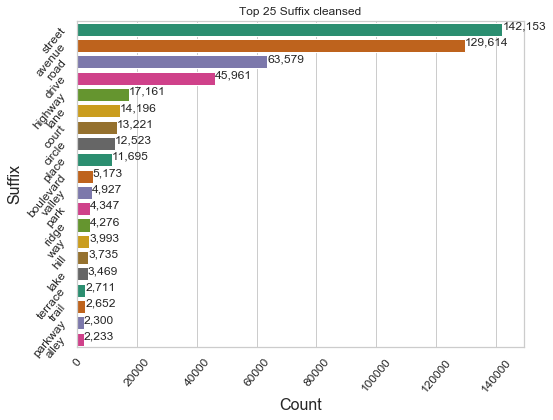

In [1129]:
top50_r1s = result1s.sort_values(['cnt'], ascending=False).head(50)

# plot1 real 
N = 5
ind = np.arange(N)
width = 0.35

fig, ax= plt.subplots(figsize =(8,6))
sns.set_style('whitegrid')
sns.set_context('notebook')
#sns.set(font_scale=2)
plt.fontsize =(35)

ax=sns.barplot( palette="Dark2", ax=ax, x='cnt', y='Word_Seg', data=top50_r1s.head(20))

for p in ax.patches:
    percentage ='{:,.0f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
#ax1=sns.barplot( palette="Dark2", ax=ax, x='Matched_Total', y='DIV_CD', data=df_stat_by_div)

    
plt.xticks(rotation =50,fontsize =12)
plt.yticks(rotation =50,fontsize =12)

plt.title('Top 25 Suffix cleansed',
         fontsize =12 
         )
plt.xlabel ('Count',fontsize = 16)
plt.ylabel ('Suffix',fontsize = 16)

plt.show ()

In [1130]:
# before consolidate suffix
result1[result1.Primary_Suffix=='center']

,Word_Seg,cnt,Primary_Suffix,Comm_suffix,Std_suffix
42,center,930,center,center,ctr
83,ctr,337,center,ctr,ctr
119,centre,14,center,centre,ctr
145,cent,94,center,cent,ctr
169,cntr,7,center,cntr,ctr
227,centr,1,center,centr,ctr


In [1131]:
# after consolidate suffix
result1s[result1s.Primary_Suffix=='center']

,Word_Seg,cnt,Primary_Suffix,Comm_suffix,Std_suffix
41,center,1383,center,center,ctr


#### Exception of suffix consolidation 

Not 100% consolidated.  But te exception is not significant and will not take further efforts

In [1132]:
# not perfect.  Still have some excption.  Not significant andwWill ignore as of now
ana_r1s = result1s.groupby('Primary_Suffix').count()
ana_r1s[ana_r1s.Word_Seg> 1]

,Word_Seg,cnt,Comm_suffix,Std_suffix
Primary_Suffix,,,,
drive,2,2,2,2
highway,2,2,2,2
road,2,2,2,2
street,2,2,2,2


In [1133]:
# one example: before
result1[result1.Primary_Suffix=='drive']

,Word_Seg,cnt,Primary_Suffix,Comm_suffix,Std_suffix
8,dr,45560,drive,dr,dr
111,drive,400,drive,drive,dr
162,drv,3,drive,drv,dr


In [1134]:
# after
result1s[result1s.Primary_Suffix=='drive']

,Word_Seg,cnt,Primary_Suffix,Comm_suffix,Std_suffix
8,drive,45961,drive,drive,dr
147,dr,2,drive,dr,dr


In [6]:
# data issue
#df_exception[df_exception.M_ADDR_s.str.contains('drive dr')][['M_ADDR_c','M_ADDR_s']]

In [1136]:
# before
result1[result1.Primary_Suffix=='street']

,Word_Seg,cnt,Primary_Suffix,Comm_suffix,Std_suffix
5,st,141878,street,st,st
74,street,279,street,street,st
245,str,3,street,str,st


In [1137]:
# after
result1s[result1s.Primary_Suffix=='street']

,Word_Seg,cnt,Primary_Suffix,Comm_suffix,Std_suffix
5,street,142153,street,street,st
131,st,7,street,st,st


In [1138]:
# not perfect.  Still have some excption.  Not significant andwWill ignore as of now
ana_r2s = result2s.groupby('Primary_Suffix').count()
ana_r2s[ana_r2s.Word_Seg> 1]

,Word_Seg,cnt,Comm_suffix,Std_suffix
Primary_Suffix,,,,
street,2,2,2,2


### Next, we will explore the data set.  Used the third party address tool to match the legacy address with address master data set.  We will analyze the matching results as well 

In [1139]:
def add_value_labels(ax, spacing=5):

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            # Vertical alignment
            va = 'top'

        label = "{:}".format(y_value)  # Use :.1f if wanting decimals.

        # Create annotation
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va)

In [1140]:
# exam matched - random sampled
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
DATAID         30000 non-null int64
M_TXT          30000 non-null object
M_DIV_CD       30000 non-null object
M_ADDR         30000 non-null object
M_CITY         30000 non-null object
M_ADDR_TYPE    30000 non-null object
P_ID           30000 non-null int64
P_ADDR         30000 non-null object
P_CITY         30000 non-null object
MATCHCODE      30000 non-null object
M_ADDR_c       30000 non-null object
P_ADDR_c       30000 non-null object
M_TXT_c        30000 non-null object
M_ADDR_s       30000 non-null object
P_ADDR_s       30000 non-null object
M_TXT_s        30000 non-null object
dtypes: int64(2), object(14)
memory usage: 3.7+ MB


In [1141]:
df_raw_sum.head()

,DATAID,M_DIV_CD,M_ADDR_TYPE,FOUND_MATCH
0,35137,d2,SIMPLE,N
1,35138,d2,SIMPLE,N
2,35139,d2,SIMPLE,N
3,35140,d2,RANGE,N
4,35141,d2,RANGE,N


In [1142]:
df_raw_sum.M_DIV_CD.unique()

array(['d2', 'd3', 'd6', 'd1', 'd7', 'd5', 'd4'], dtype=object)

In [1143]:
df_raw_sum[df_raw_sum.FOUND_MATCH=='Y'].head()

,DATAID,M_DIV_CD,M_ADDR_TYPE,FOUND_MATCH
11,35148,d2,SIMPLE,Y
63,35203,d2,SIMPLE,Y
64,35204,d2,SIMPLE,Y
65,35205,d2,SIMPLE,Y
66,35206,d2,SIMPLE,Y


In [1144]:
stat = df_raw_sum.groupby('M_DIV_CD').DATAID.count()
df_temp = pd.DataFrame({'DIV_CD':stat.index, 'Raw_Total':stat.values})

stat2 = df_raw_sum[df_raw_sum.FOUND_MATCH=='Y'].groupby('M_DIV_CD').DATAID.count()
df_temp2 = pd.DataFrame({'DIV_CD':stat2.index, 'Matched_Total':stat2.values})

df_stat_by_div = pd.merge(df_temp, df_temp2, on='DIV_CD', how='outer')

In [1145]:
stat2

M_DIV_CD
d1     23098
d2    341756
d3     28863
d4     83720
d5     26632
d6     22205
d7     23881
Name: DATAID, dtype: int64

In [1146]:
df_stat_by_div

,DIV_CD,Raw_Total,Matched_Total
0,d1,81691,23098
1,d2,622397,341756
2,d3,63682,28863
3,d4,141892,83720
4,d5,49242,26632
5,d6,43782,22205
6,d7,77888,23881


In [1147]:
stat = df_raw_sum.groupby('M_ADDR_TYPE').DATAID.count()
df_temp = pd.DataFrame({'TYPE':stat.index, 'Raw_Total':stat.values})

stat2 = df_raw_sum[df_raw_sum.FOUND_MATCH=='Y'].groupby('M_ADDR_TYPE').DATAID.count()
df_temp2 = pd.DataFrame({'TYPE':stat2.index, 'Matched_Total':stat2.values})

df_stat_by_type = pd.merge(df_temp, df_temp2, on='TYPE', how='outer')

In [1148]:
df_stat_by_type

,TYPE,Raw_Total,Matched_Total
0,BLANK,69985,6.0
1,BLOCK,2581,NaN
2,LOT,21160,43.0
3,MULTI,3243,1863.0
4,NOTDEFINED,18089,3757.0
5,RANGE,22646,9968.0
6,ROUTE,8995,NaN
7,SIMPLE,933875,534518.0


In [1149]:
df_stat_by_type.fillna(0, inplace=True)

In [1150]:
df_stat_by_type

,TYPE,Raw_Total,Matched_Total
0,BLANK,69985,6.0
1,BLOCK,2581,0.0
2,LOT,21160,43.0
3,MULTI,3243,1863.0
4,NOTDEFINED,18089,3757.0
5,RANGE,22646,9968.0
6,ROUTE,8995,0.0
7,SIMPLE,933875,534518.0


In [1151]:
print (df_raw_sum.groupby(['M_DIV_CD','FOUND_MATCH']).size().unstack(fill_value=0))

FOUND_MATCH       N       Y
M_DIV_CD                   
d1            58593   23098
d2           280641  341756
d3            34819   28863
d4            58172   83720
d5            22610   26632
d6            21577   22205
d7            54007   23881


In [1152]:
print (df_raw_sum.groupby(['M_ADDR_TYPE','FOUND_MATCH']).size().unstack(fill_value=0))

FOUND_MATCH       N       Y
M_ADDR_TYPE                
BLANK         69979       6
BLOCK          2581       0
LOT           21117      43
MULTI          1380    1863
NOTDEFINED    14332    3757
RANGE         12678    9968
ROUTE          8995       0
SIMPLE       399357  534518


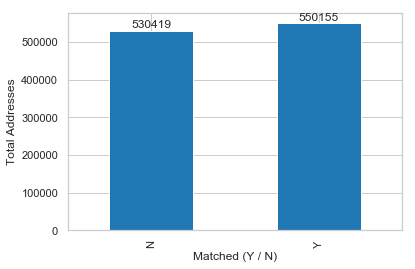

In [1153]:
plt.figure(figsize=(6,4))

result_plot = df_raw_sum.groupby(['FOUND_MATCH']).DATAID.count().plot.bar()
plt.xlabel('Matched (Y / N)')
plt.ylabel('Total Addresses')
add_value_labels(result_plot, 1)
plt.show()

### Total 550155 found match but still have 530419 not found the match 

<Figure size 576x432 with 0 Axes>

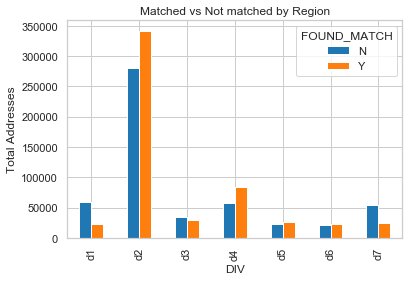

In [1154]:
plt.figure(figsize=(8,6))

rsd_plot = df_raw_sum.groupby(['M_DIV_CD','FOUND_MATCH']).size().unstack(fill_value=0).plot.bar()
plt.xlabel('DIV')
plt.ylabel('Total Addresses')
plt.title('Matched vs Not matched by Region')
#add_value_labels(rsd_plot, 1)
plt.show()

### The above plot shows the matched vs not matched within each region 

<Figure size 576x432 with 0 Axes>

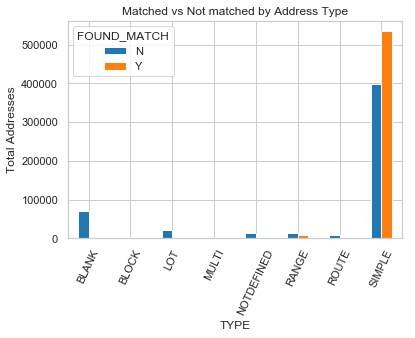

In [1155]:
plt.figure(figsize=(8,6))
rst_plot = df_raw_sum.groupby(['M_ADDR_TYPE','FOUND_MATCH']).size().unstack(fill_value=0).plot.bar()
plt.xlabel('TYPE')
plt.ylabel('Total Addresses')
plt.title('Matched vs Not matched by Address Type')
#add_value_labels(rst_plot, 1)
plt.xticks(rotation=65) 
plt.show()

### The above plot shows the matched vs not matched by address type.  Majority addresses have SIMPLE type.  Addresses in df_exception are the exceptions that the third party address tool couldn't resolve.  df_exception will be the data set for me to apply DLP techniques to identify the matching.

## Fuzzywuzzy functions EDA
Next, will apply these four Fuzzywuzzy fuctions to the sampled data of matched addresses using the third-party address tool.  The confidence level of matching is about 94%.  Then will compare the results and choos the function works best for this data set.

In [1156]:
def get_partial_ratio1(row):
    string1 = row['M_ADDR_c']
    string2 = row['P_ADDR_c']
    return fuzz.partial_ratio(string1, string2)

def get_partial_ratio2(row):
    string1 = row['M_TXT_c']
    string2 = row['P_ADDR_c']
    return fuzz.partial_ratio(string1, string2)
'''
df_match['pr1']=df_match.apply(get_partial_ratio1, axis=1)
df_match['pr2']=df_match.apply(get_partial_ratio2, axis=1)
'''

"\ndf_match['pr1']=df_match.apply(get_partial_ratio1, axis=1)\ndf_match['pr2']=df_match.apply(get_partial_ratio2, axis=1)\n"

In [1157]:
def get_token_set_ratio1(row):
    string1 = row['M_ADDR_c']
    string2 = row['P_ADDR_c']
    return fuzz.token_set_ratio(string1, string2)

def get_token_set_ratio2(row):
    string1 = row['M_TXT_c']
    string2 = row['P_ADDR_c']
    return fuzz.token_set_ratio(string1, string2)
'''
df_match['tstr1']=df_match.apply(get_token_set_ratio1, axis=1)
df_match['tstr2']=df_match.apply(get_token_set_ratio2, axis=1)
'''

"\ndf_match['tstr1']=df_match.apply(get_token_set_ratio1, axis=1)\ndf_match['tstr2']=df_match.apply(get_token_set_ratio2, axis=1)\n"

In [1158]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
DATAID         30000 non-null int64
M_TXT          30000 non-null object
M_DIV_CD       30000 non-null object
M_ADDR         30000 non-null object
M_CITY         30000 non-null object
M_ADDR_TYPE    30000 non-null object
P_ID           30000 non-null int64
P_ADDR         30000 non-null object
P_CITY         30000 non-null object
MATCHCODE      30000 non-null object
M_ADDR_c       30000 non-null object
P_ADDR_c       30000 non-null object
M_TXT_c        30000 non-null object
M_ADDR_s       30000 non-null object
P_ADDR_s       30000 non-null object
M_TXT_s        30000 non-null object
dtypes: int64(2), object(14)
memory usage: 3.7+ MB


In [1159]:
# address is cleansed.  Suffix is not consolidated
df_match['r1'] = df_match.apply(lambda row: fuzz.ratio(row['M_ADDR_c'], row['P_ADDR_c']), axis=1)
df_match['pr1'] = df_match.apply(lambda row: fuzz.partial_ratio(row['M_ADDR_c'], row['P_ADDR_c']), axis=1)
df_match['tsr1'] = df_match.apply(lambda row: fuzz.token_sort_ratio(row['M_ADDR_c'], row['P_ADDR_c']), axis=1)
df_match['tstr1'] = df_match.apply(lambda row: fuzz.token_set_ratio(row['M_ADDR_c'], row['P_ADDR_c']), axis=1)

In [1160]:
# address is cleansed.  Suffix is consolidated to USPS primary suffix
df_match['r1s'] = df_match.apply(lambda row: fuzz.ratio(row['M_ADDR_s'], row['P_ADDR_s']), axis=1)
df_match['pr1s'] = df_match.apply(lambda row: fuzz.partial_ratio(row['M_ADDR_s'], row['P_ADDR_s']), axis=1)
df_match['tsr1s'] = df_match.apply(lambda row: fuzz.token_sort_ratio(row['M_ADDR_s'], row['P_ADDR_s']), axis=1)
df_match['tstr1s'] = df_match.apply(lambda row: fuzz.token_set_ratio(row['M_ADDR_s'], row['P_ADDR_s']), axis=1)

In [1161]:
# Fuzzywuzzy ratio matrix
data_to_display=['M_DIV_CD','M_ADDR_TYPE','r1','pr1','tsr1','tstr1','r1s','pr1s','tsr1s','tstr1s']
df_match[df_match.pr1<95][data_to_display].head()

,M_DIV_CD,M_ADDR_TYPE,r1,pr1,tsr1,tstr1,r1s,pr1s,tsr1s,tstr1s
7,d2,SIMPLE,87,84,86,90,81,78,78,82
16,d2,RANGE,88,93,86,100,90,94,88,100
17,d2,SIMPLE,97,94,97,97,98,95,97,97
21,d2,SIMPLE,97,94,97,97,98,95,97,97
24,d2,SIMPLE,89,88,88,88,89,88,88,88


### Calculate percentage of matching with ratio above 90% 

In [1162]:
r1_match_pct = len(df_match[df_match.r1 > 90]) / len(df_match)
pr1_match_pct = len(df_match[df_match.pr1 > 90]) / len(df_match)
tsr1_match_pct = len(df_match[df_match.tsr1 > 90]) / len(df_match)
tstr1_match_pct = len(df_match[df_match.tstr1 > 90]) / len(df_match)
print('r1 match (%>90) = ', r1_match_pct)
print('pr1 match (%>90) = ', pr1_match_pct)
print('tsr1 match (%>90) = ', tsr1_match_pct)
print('tstr1 match (%>90) = ', tstr1_match_pct)
print()
r1s_match_pct = len(df_match[df_match.r1s > 90]) / len(df_match)
pr1s_match_pct = len(df_match[df_match.pr1s > 90]) / len(df_match)
tsr1s_match_pct = len(df_match[df_match.tsr1s > 90]) / len(df_match)
tstr1s_match_pct = len(df_match[df_match.tstr1s > 90]) / len(df_match)
print('r1s match (%>90) = ', r1s_match_pct)
print('pr1s match (%>90) = ', pr1s_match_pct)
print('tsr1s match (%>90) = ', tsr1s_match_pct)
print('tstr1s match (%>90) = ', tstr1s_match_pct)
print()

r1 match (%>90) =  0.8581
pr1 match (%>90) =  0.8755
tsr1 match (%>90) =  0.8383666666666667
tstr1 match (%>90) =  0.908

r1s match (%>90) =  0.8698333333333333
pr1s match (%>90) =  0.8921
tsr1s match (%>90) =  0.8601
tstr1s match (%>90) =  0.9305333333333333



#### Compared result s (with ratio>90).  The performance of Fuzywuzzy funtions rank in this order
token_set_raion > partial_ratio > ratio > token_sort_ratio

After consolidated suffix, the ratio of token_set_ratio improved from 90.5% to 93%

In [1163]:
r1_mean = df_match['r1'].mean()
pr1_mean = df_match['pr1'].mean()
tsr1_mean = df_match['tsr1'].mean()
tstr1_mean = df_match['tstr1'].mean()
print('r1 mean (%) = ', r1_mean)
print('pr1 mean (%) = ', pr1_mean)
print('tsr1 mean (%) = ', tsr1_mean)
print('tstr1 mean (%) = ', tstr1_mean)
print()
r1s_mean = df_match['r1s'].mean()
pr1s_mean = df_match['pr1s'].mean()
tsr1s_mean = df_match['tsr1s'].mean()
tstr1s_mean = df_match['tstr1s'].mean()
print('r1s mean (%) = ', r1s_mean)
print('pr1s mean (%) = ', pr1s_mean)
print('tsr1s mean (%) = ', tsr1s_mean)
print('tstr1s mean (%) = ', tstr1s_mean)
print()

r1 mean (%) =  96.6229
pr1 mean (%) =  96.90603333333334
tsr1 mean (%) =  96.0952
tstr1 mean (%) =  97.72556666666667

r1s mean (%) =  97.0433
pr1s mean (%) =  97.17993333333334
tsr1s mean (%) =  96.34213333333334
tstr1s mean (%) =  98.1479



### After consolidating address suffix, the matching counts increased 

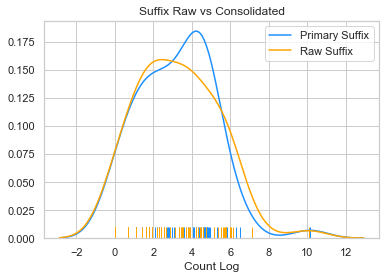

In [1164]:
#plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( np.log(df_match.groupby('tstr1s').M_ADDR.count().values) , color="dodgerblue", label="Primary Suffix", hist=False, rug=True)
sns.distplot( np.log(df_match.groupby('tstr1').M_ADDR.count().values) , color="orange", label="Raw Suffix", hist=False, rug=True)

plt.xlabel('Count Log')
plt.title('Suffix Raw vs Consolidated')
plt.legend();

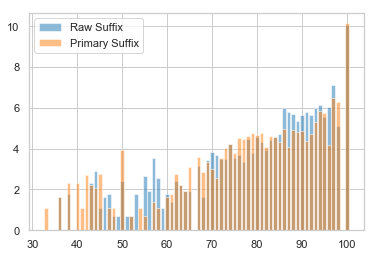

In [1165]:
plt.bar(df_match.groupby('tstr1').M_ADDR.count().index, np.log(df_match.groupby('tstr1').M_ADDR.count().values), alpha=0.5, label='Raw Suffix')
plt.bar(df_match.groupby('tstr1s').M_ADDR.count().index, np.log(df_match.groupby('tstr1s').M_ADDR.count().values), alpha=0.5, label='Primary Suffix')
plt.legend()

## Machine Learning 

In [1166]:
def ngrams(string, n=3): 
    ngrams = zip(*[string[i:] for i in range(n)])
    return [''.join(ngram) for ngram in ngrams]

In [1167]:
#import numpy as np
from scipy.sparse import csr_matrix
#!pip install sparse_dot_topn 
import sparse_dot_topn.sparse_dot_topn as ct
def awesome_cossim_top(A, B, ntop, lower_bound=0):
    # force A and B as a CSR matrix.
    # If they have already been CSR, there is no overhead
    A = A.tocsr()
    B = B.tocsr()
    M, _ = A.shape
    _, N = B.shape
 
    idx_dtype = np.int32 
    nnz_max = M*ntop
    indptr = np.zeros(M+1, dtype=idx_dtype)
    indices = np.zeros(nnz_max, dtype=idx_dtype)
    data = np.zeros(nnz_max, dtype=A.dtype)        

    ct.sparse_dot_topn(
        M, N, np.asarray(A.indptr, dtype=idx_dtype),
        np.asarray(A.indices, dtype=idx_dtype),
        A.data,
        np.asarray(B.indptr, dtype=idx_dtype),
        np.asarray(B.indices, dtype=idx_dtype),
        B.data,
        ntop,
        lower_bound,
        indptr, indices, data)
    return csr_matrix((data,indices,indptr),shape=(M,N))

In [1168]:
def get_matches_df_2(sparse_matrix, name_vector, name_vector2):#,top=100):
    non_zeros = sparse_matrix.nonzero()
    
    sparserows = non_zeros[0]
    sparsecols = non_zeros[1]
    
    nr_matches = sparsecols.size
    
    #if top < sparsecols.size:
       # nr_matches = top
        
    #else:
        #nr_matches
    
    left_side = np.empty([nr_matches], dtype=object)
    right_side = np.empty([nr_matches], dtype=object)
    similarity = np.zeros(nr_matches)
    
    for index in range(0, nr_matches):
        #print('index = ', index)
        left_side[index] = name_vector[sparserows[index]]
        right_side[index] = name_vector2[sparsecols[index]]
        similarity[index] = sparse_matrix.data[index]
    
    return pd.DataFrame({'Messy_addr': left_side,
                         'Master_addr': right_side,
                          'Similarity': similarity})

In [1169]:
def getNearestN(query):
    queryTFIDF_ = vectorizer.transform(query)
    distances, indices = nbrs.kneighbors(queryTFIDF_)
    return distances, indices

### Compare different text matching techniques to a sampled data set 

Three techniques:

Fuzzywuzzy

KNN

ING (a fast matching algorithm)

#### Data Set  - subset of matched addresses which have better data quality.  Keep data size small.

In [1170]:
df_match.groupby('M_DIV_CD').DATAID.count()

M_DIV_CD
d1     1322
d2    18544
d3     1645
d4     4584
d5     1421
d6     1195
d7     1289
Name: DATAID, dtype: int64

In [1171]:
df_master[df_master.P_DIV_CD=='d6'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19100 entries, 486667 to 505766
Data columns (total 6 columns):
P_DIV_CD    19100 non-null object
P_ADDR      19100 non-null object
P_CITY      19100 non-null object
P_ADDR_c    19100 non-null object
P_CITY_c    19100 non-null object
P_ADDR_s    19100 non-null object
dtypes: object(6)
memory usage: 1.0+ MB


In [1172]:
ds1 = df_match[df_match.M_DIV_CD=='d6'].M_ADDR_s.unique()
ds2 = df_master[df_master.P_DIV_CD=='d6'].P_ADDR_s.unique()

In [1173]:
len(ds1), len(ds2)

(1107, 19023)

### Apply Fuzzywuzzy 

In [1174]:
import pandas as pd 
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process

def checker(to_be_matched,match_options):
    names_messy=[]
    names_master=[]
    ratio_array=[]    
    for rec in to_be_matched:
        if rec in match_options:
            names_messy.append(rec)
            names_master.append(rec)
            ratio_array.append(100)
        else:   
            x=process.extractOne(rec, match_options,scorer=fuzz.token_set_ratio)
            names_messy.append(rec)
            names_master.append(x[0])
            ratio_array.append(x[1])
    return names_messy, names_master,ratio_array

In [1175]:
ti = time.time()
print('Fuzzywuzzy matching start...')
messy_addr,master_addr,ratio_match=checker(ds1, ds2)
print('Completed.')

t=time.time() - t1
print('Total time consumed:', t)

Fuzzywuzzy matching start...
Completed.
Total time consumed: 152.90584063529968


In [1176]:
matches_fz = pd.DataFrame()
matches_fz['Messy_addr'] = messy_addr
matches_fz ['Master_addr']= master_addr
matches_fz ['tstr1s']= ratio_match

In [1177]:
matches_fz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 3 columns):
Messy_addr     1107 non-null object
Master_addr    1107 non-null object
tstr1s         1107 non-null int64
dtypes: int64(1), object(2)
memory usage: 26.0+ KB


In [1178]:
fz_tstr1s_match_pct = len(matches_fz[matches_fz.tstr1s > 90]) / len(matches_fz)
print('tstr1s match (%>90) = ', fz_tstr1s_match_pct)
print()

tstr1s match (%>90) =  0.9611562782294489



### Apply KNN - get nearest N=1

In [1179]:
N = 1

master_addr = ds2#df_addr_g_s.ADDR.values
messy_addr = set(ds1)  # set used for increased performance

t1 = time.time()

print('Vecorizing the data - this could take a few minutes for large datasets...')
vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams)#, lowercase=False)
tfidf = vectorizer.fit_transform(master_addr)
print('Vecorizing completed...time used: ', t)

#from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=N, n_jobs=-1).fit(tfidf)

#matching query:
def getNearestN(query):
    queryTFIDF_ = vectorizer.transform(query)
    distances, indices = nbrs.kneighbors(queryTFIDF_)
    return distances, indices

# get timing
t2 = time.time()
print('getting nearest n...')
distances, indices = getNearestN(messy_addr)
t = time.time()-t2
print("COMPLETED IN:", t)

messy_addr = list(messy_addr) #need to convert back to a list

print('finding matches...')
matches_knn_t = []

for i,j in enumerate(indices):
    temp = [round(distances[i][0],2), master_addr[j],messy_addr[i]]
    matches_knn_t.append(temp)
print("COMPLETED IN", t)

t = time.time()
print('Total time consumed:', t - t1)

print('Building data frame...')  
matches_knn_t = pd.DataFrame(matches_knn_t, columns=['Match_confidence_lowerisbetter','Master_addr','Messy_addr'])
print('Done')
# run Fuzzywuzzy and populate match ratio
matches_knn_t['pr1s'] = matches_knn_t.apply(lambda row: fuzz.partial_ratio(row['Messy_addr'], row['Master_addr']), axis=1)
matches_knn_t['tsr1s'] = matches_knn_t.apply(lambda row: fuzz.token_sort_ratio(row['Messy_addr'], row['Master_addr']), axis=1)
matches_knn_t['tstr1s'] = matches_knn_t.apply(lambda row: fuzz.token_set_ratio(row['Messy_addr'], row['Master_addr']), axis=1)
matches_knn_t['r1s'] = matches_knn_t.apply(lambda row: fuzz.ratio(row['Messy_addr'], row['Master_addr']), axis=1)

r1s_match_pct = len(matches_knn_t[matches_knn_t.r1s > 90]) / len(matches_knn_t)
pr1s_match_pct = len(matches_knn_t[matches_knn_t.pr1s > 90]) / len(matches_knn_t)
tsr1s_match_pct = len(matches_knn_t[matches_knn_t.tsr1s > 90]) / len(matches_knn_t)
tstr1s_match_pct = len(matches_knn_t[matches_knn_t.tstr1s > 90]) / len(matches_knn_t)

print('r1s match (%>90) = ', r1s_match_pct)
print('pr1s match (%>90) = ', pr1s_match_pct)
print('tsr1s match (%>90) = ', tsr1s_match_pct)
print('tstr1s match (%>90) = ', tstr1s_match_pct)
print()

Vecorizing the data - this could take a few minutes for large datasets...
Vecorizing completed...time used:  152.90584063529968
getting nearest n...
COMPLETED IN: 4.158198118209839
finding matches...
COMPLETED IN 4.158198118209839
Total time consumed: 4.798900365829468
Building data frame...
Done
r1s match (%>90) =  0.7199638663053297
pr1s match (%>90) =  0.8518518518518519
tsr1s match (%>90) =  0.8970189701897019
tstr1s match (%>90) =  0.9376693766937669



In [1180]:
matches_knn_t.sort_values(['Match_confidence_lowerisbetter'], ascending=False).head()

,Match_confidence_lowerisbetter,Master_addr,Messy_addr,pr1s,tsr1s,tstr1s,r1s
1038,1.04,[ 317 10th avenue ],317 tenth avenue,84,65,84,78
513,0.97,[ 2902 n broad street ],2902 broad street north,80,90,94,77
452,0.97,[ 810 3rd avenue ],810 third avenue,84,67,87,80
1035,0.96,[ 1007 3rd avenue ],1007 third avenue,85,69,88,81
784,0.95,[ 2 range street ],1826 range street,85,90,92,83


In [1181]:
len(matches_knn_t[matches_knn_t.Match_confidence_lowerisbetter==0])/len(matches_knn_t)

0.7181571815718157

In [1182]:
matches_knn_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
Match_confidence_lowerisbetter    1107 non-null float64
Master_addr                       1107 non-null object
Messy_addr                        1107 non-null object
pr1s                              1107 non-null int64
tsr1s                             1107 non-null int64
tstr1s                            1107 non-null int64
r1s                               1107 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 60.6+ KB


In [1183]:
print('Match_confidence Max:', matches_knn_t.Match_confidence_lowerisbetter.max())
print('Match_confidence Min:', matches_knn_t.Match_confidence_lowerisbetter.min())
print('Match_confidence Mean:', matches_knn_t.Match_confidence_lowerisbetter.mean())
print('Match_confidence Median:', matches_knn_t.Match_confidence_lowerisbetter.median())

Match_confidence Max: 1.04
Match_confidence Min: 0.0
Match_confidence Mean: 0.16529358626919596
Match_confidence Median: 0.0


Text(0.5, 1.0, 'KNN match confidence = 0 (highest match) ')

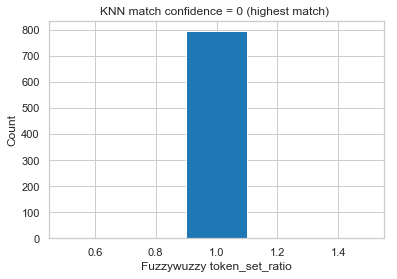

In [1184]:
_=plt.hist(matches_knn_t[matches_knn_t.Match_confidence_lowerisbetter==0].tstr1s/100, bins=5)
plt.xlabel('Fuzzywuzzy token_set_ratio')
plt.ylabel('Count')
plt.title('KNN match confidence = 0 (highest match) ')

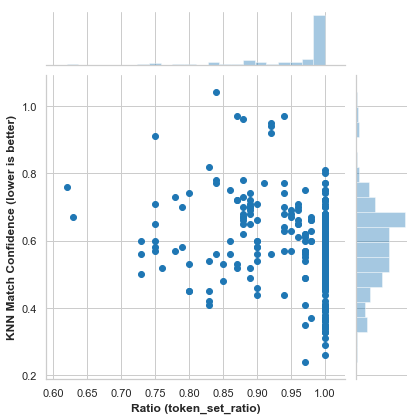

In [1185]:
y = matches_knn_t[matches_knn_t.Match_confidence_lowerisbetter>0].Match_confidence_lowerisbetter
x = matches_knn_t[matches_knn_t.Match_confidence_lowerisbetter>0].tstr1s/100

#_=plt.scatter(x, y)
h = sns.jointplot(x=x, y=y);
h.ax_joint.set_xlabel('Ratio (token_set_ratio)', fontweight='bold')
h.ax_joint.set_ylabel('KNN Match Confidence (lower is better)', fontweight='bold')

y = matches_knn_t[matches_knn_t.Match_confidence_lowerisbetter>0].Match_confidence_lowerisbetter
x = matches_knn_t[matches_knn_t.Match_confidence_lowerisbetter>0].tstr1s/100#plt.tight_layout()

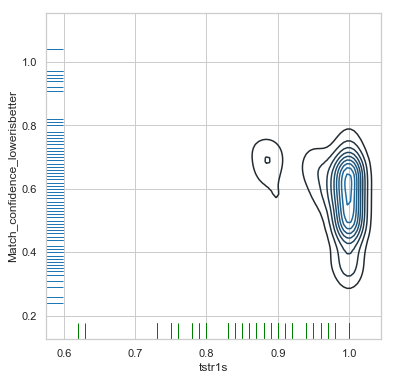

In [1186]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(x, y, ax=ax)
sns.rugplot(x, color="g", ax=ax)
sns.rugplot(y, vertical=True, ax=ax);

### ING Faster match 

Using TF-IDF, N-Grams, and sparse matrix multiplication. To optimize for these disadvantages they created their own library which stores only the top N highest matches in each row, and only the similarities above an (optional) threshold.

In [1187]:
top_N = 1
similarity = 0

In [1188]:
def run_ING_match (str1, str2, top_N, similarity):
    
    t1 = time.time()
    print('building tf-idf vector n...')

    #addr_str = ds_m_d6#ds2 # master address
    #addr_str2 =ds_e_d6# ds1 # messy address

    vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams)

    #tf_idf_matrix = vectorizer.fit_transform(addr_str)
    #tf_idf_matrix2 = vectorizer.transform(addr_str2)
    tfidf_mtx = vectorizer.fit_transform(str1)
    tfidf_mtx2 = vectorizer.transform(str2)

    t = time.time()-t1
    print("Time used:", t)
    
    t2 = time.time()
    print('awesome_cossim_top n...')

    # return top 1 most silimar item without caring about similarity
    matches_ING = awesome_cossim_top(tfidf_mtx2, tfidf_mtx.transpose(), top_N, similarity)

    t = time.time()- t2
    print("Time used:", t)

    t3 = time.time()
    print('getting matches_df n...')

    matches_df = get_matches_df_2(matches_ING, str2, str1)

    t = time.time()- t3
    print("Time used:", t)

    t = time.time()- t1
    print("Total time consumed:", t)
    
    # run Fuzzywuzzy and populate match ratio
    matches_df['pr1s'] = matches_df.apply(lambda row: fuzz.partial_ratio(row['Messy_addr'], row['Master_addr']), axis=1)
    matches_df['tsr1s'] = matches_df.apply(lambda row: fuzz.token_sort_ratio(row['Messy_addr'], row['Master_addr']), axis=1)
    matches_df['tstr1s'] = matches_df.apply(lambda row: fuzz.token_set_ratio(row['Messy_addr'], row['Master_addr']), axis=1)
    matches_df['r1s'] = matches_df.apply(lambda row: fuzz.ratio(row['Messy_addr'], row['Master_addr']), axis=1)

    pr1s_match_pct = len(matches_df[matches_df.pr1s > 90]) / len(matches_df)
    tsr1s_match_pct = len(matches_df[matches_df.tsr1s > 90]) / len(matches_df)
    tstr1s_match_pct = len(matches_df[matches_df.tstr1s > 90]) / len(matches_df)
    r1s_match_pct = len(matches_df[matches_df.r1s > 90]) / len(matches_df)

    print('r1s match (%>90) = ', r1s_match_pct)

    print('pr1s match (%>90) = ', pr1s_match_pct)
    print('tsr1s match (%>90) = ', tsr1s_match_pct)
    print('tstr1s match (%>90) = ', tstr1s_match_pct)
    print()
    
    return matches_df

In [1189]:
def run_ING_match_N (str1, str2, top_N, similarity):
    
    t1 = time.time()
    #print('building tf-idf vector n...')

    vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams)

    tfidf_mtx = vectorizer.fit_transform(str1)
    tfidf_mtx2 = vectorizer.transform(str2)

    #t = time.time()-t1
    #print("Time used:", t)
    
    #t2 = time.time()
    #print('awesome_cossim_top n...')

    # return top 1 most silimar item without caring about similarity
    matches_ING = awesome_cossim_top(tfidf_mtx2, tfidf_mtx.transpose(), top_N, similarity)

    #t = time.time()- t2
    #print("Time used:", t)

    #t3 = time.time()
    #print('getting matches_df n...')

    matches_df = get_matches_df_2(matches_ING, str2, str1)

    #t = time.time()- t3
    #print("Time used:", t)    
    
    # run Fuzzywuzzy and populate match ratio
    matches_df['pr1s'] = matches_df.apply(lambda row: fuzz.partial_ratio(row['Messy_addr'], row['Master_addr']), axis=1)
    matches_df['tsr1s'] = matches_df.apply(lambda row: fuzz.token_sort_ratio(row['Messy_addr'], row['Master_addr']), axis=1)
    matches_df['tstr1s'] = matches_df.apply(lambda row: fuzz.token_set_ratio(row['Messy_addr'], row['Master_addr']), axis=1)
    matches_df['r1s'] = matches_df.apply(lambda row: fuzz.ratio(row['Messy_addr'], row['Master_addr']), axis=1)

    t = time.time()- t1
    print("Top 2 and 100 Completed in:", t)
    
    return matches_df

In [1190]:
matches_good = run_ING_match (ds2, ds1, top_N, similarity)

building tf-idf vector n...
Time used: 0.5188751220703125
awesome_cossim_top n...
Time used: 0.23813438415527344
getting matches_df n...
Time used: 0.004509925842285156
Total time consumed: 0.7635231018066406
r1s match (%>90) =  0.8925022583559169
pr1s match (%>90) =  0.8762420957542909
tsr1s match (%>90) =  0.8970189701897019
tstr1s match (%>90) =  0.9376693766937669



In [1191]:
matches_good.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
Messy_addr     1107 non-null object
Master_addr    1107 non-null object
Similarity     1107 non-null float64
pr1s           1107 non-null int64
tsr1s          1107 non-null int64
tstr1s         1107 non-null int64
r1s            1107 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 60.6+ KB


Text(0.5, 1.0, 'Similarity')

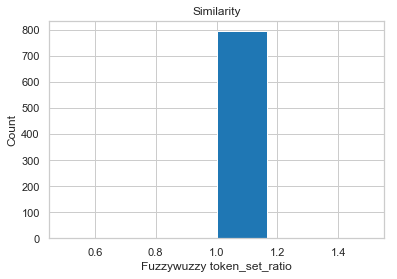

In [1192]:
_=plt.hist(matches_good[matches_good.Similarity>=0.99999].tstr1s/100, bins=6)
plt.xlabel('Fuzzywuzzy token_set_ratio')
plt.ylabel('Count')
plt.title('Similarity')

In [1193]:
print('Similarity Max:', matches_good.Similarity.max())
print('Similarity Min:', matches_good.Similarity.min())
print('Similarity Mean:', matches_good.Similarity.mean())
print('Similarity Median:', matches_good.Similarity.median())

Similarity Max: 1.0000000000000007
Similarity Min: 0.45857307825900095
Similarity Mean: 0.9493159526365924
Similarity Median: 0.9999999999999999


Text(25.0, 0.5, 'Similarity')

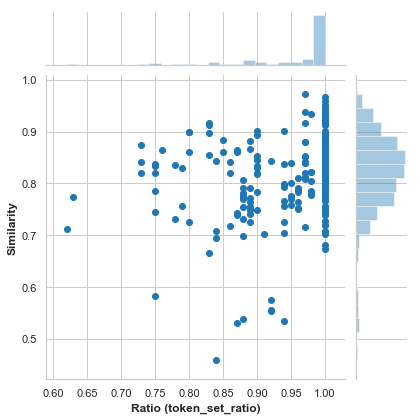

In [1194]:
y1 = matches_good[matches_good.Similarity<0.99999].Similarity
x1 = matches_good[matches_good.Similarity<0.99999].tstr1s/100

#_=plt.scatter(x, y)
h = sns.jointplot(x=x1, y=y1);
h.ax_joint.set_xlabel('Ratio (token_set_ratio)', fontweight='bold')
h.ax_joint.set_ylabel('Similarity', fontweight='bold')

#plt.tight_layout()

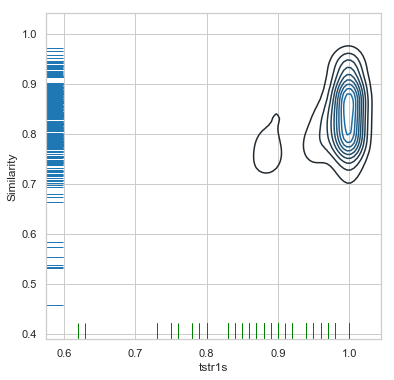

In [1195]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(x1, y1, ax=ax)
sns.rugplot(x1, color="g", ax=ax)
sns.rugplot(y1, vertical=True, ax=ax);

In [1196]:
len(matches_good.Messy_addr.unique()), len(ds1), len(ds2)

(1107, 1107, 19023)

### Compare Fuzzywuzzy, KNN and ING matching results 

In [1197]:
len(matches_knn_t[matches_knn_t.Match_confidence_lowerisbetter==0])/len(matches_knn_t)

0.7181571815718157

In [1198]:
len(matches_good[matches_good.Similarity==1])/len(matches_good)

0.27371273712737126

In [1199]:
matches_knn_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
Match_confidence_lowerisbetter    1107 non-null float64
Master_addr                       1107 non-null object
Messy_addr                        1107 non-null object
pr1s                              1107 non-null int64
tsr1s                             1107 non-null int64
tstr1s                            1107 non-null int64
r1s                               1107 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 60.6+ KB


In [1200]:
matches_good.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
Messy_addr     1107 non-null object
Master_addr    1107 non-null object
Similarity     1107 non-null float64
pr1s           1107 non-null int64
tsr1s          1107 non-null int64
tstr1s         1107 non-null int64
r1s            1107 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 60.6+ KB


In [1201]:
# merge results from three methods into a single dataframe
df_knn = matches_knn_t.copy()
df_knn.columns=['k_match_ratio','k_matched_addr','orig_addr','k_pr','k_tsr','k_tstr','k_r']

df_ing = matches_good.copy()
df_ing.columns = ['orig_addr','i_matched_addr','i_match_ratio','i_pr','i_tsr','i_tstr','i_r']

# merge ING with KNN
df_merged = pd.merge(df_ing, df_knn,how='inner', on='orig_addr')
# merge Fuzzywuzzy
df_merged = pd.merge(df_merged, matches_fz, how='inner', left_on='orig_addr', right_on='Messy_addr')

In [1202]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 16 columns):
orig_addr         1107 non-null object
i_matched_addr    1107 non-null object
i_match_ratio     1107 non-null float64
i_pr              1107 non-null int64
i_tsr             1107 non-null int64
i_tstr            1107 non-null int64
i_r               1107 non-null int64
k_match_ratio     1107 non-null float64
k_matched_addr    1107 non-null object
k_pr              1107 non-null int64
k_tsr             1107 non-null int64
k_tstr            1107 non-null int64
k_r               1107 non-null int64
Messy_addr        1107 non-null object
Master_addr       1107 non-null object
tstr1s            1107 non-null int64
dtypes: float64(2), int64(9), object(5)
memory usage: 147.0+ KB


In [1203]:
# Compare if KNN and ING return different matching addresses

df_merged['k_matched_addr_c']=df_merged.apply(lambda row: cleanse_str(str(row['k_matched_addr'])), axis=1)

def que(x):
    if x['i_matched_addr'].strip()==x['k_matched_addr_c'].strip():
        return 'Y'
    else:
        return 'N'
    
df_merged['i_equ_k'] = df_merged.apply(que, axis=1)

In [1204]:
len(df_merged[df_merged.i_equ_k=='N'])

0

In [1205]:
df_merged[df_merged.i_matched_addr.str.strip()!=df_merged.k_matched_addr_c.str.strip()].head()

,orig_addr,i_matched_addr,i_match_ratio,i_pr,i_tsr,i_tstr,i_r,k_match_ratio,k_matched_addr,k_pr,k_tsr,k_tstr,k_r,Messy_addr,Master_addr,tstr1s,k_matched_addr_c,i_equ_k


In [1206]:
def que(x):
    if x['i_matched_addr'].strip()==x['Master_addr'].strip():
        return 'Y'
    else:
        return 'N'
    
df_merged['i_equ_fz'] = df_merged.apply(que, axis=1)

### Export the difference and manually identify the error.  Then calcualte the error rate 

In [1207]:
len(df_merged[df_merged.i_equ_fz=='N'])

63

In [1208]:
df_merged[df_merged.i_equ_fz=='N'].to_csv('DLP_sample_diff_FZ_KNN_ING.csv')

### KNN and ING match to the same address.  Out of 1107, Fuzzywuzzy matched to different 63 addresses.  Export the difference for manual review and analysis.  94.3% matched to the same address as KNN and ING.

<BarContainer object of 20 artists>

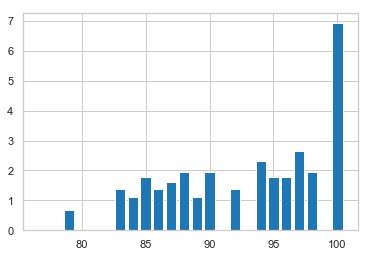

In [1209]:
x_fz = df_merged.groupby('tstr1s').orig_addr.count().index
y_fz = np.log(df_merged.groupby('tstr1s').orig_addr.count().values)

plt.bar(x_fz, y_fz)

<BarContainer object of 24 artists>

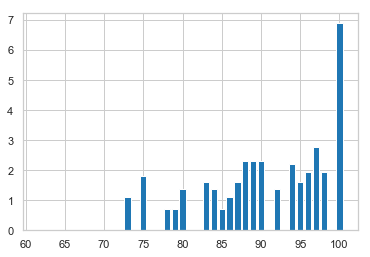

In [1210]:
plt.bar(df_merged.groupby('i_tstr').orig_addr.count().index, np.log(df_merged.groupby('i_tstr').orig_addr.count().values))

<BarContainer object of 24 artists>

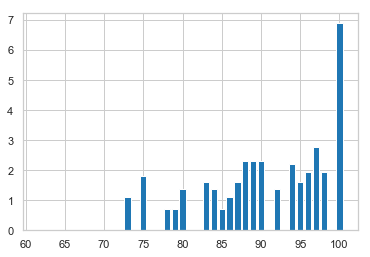

In [1211]:
plt.bar(df_merged.groupby('k_tstr').orig_addr.count().index, np.log(df_merged.groupby('k_tstr').orig_addr.count().values))

## Apply KNN and ING to large and messy data set 

### Data Set - from df_exception

In [1212]:
df_exception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525887 entries, 0 to 530436
Data columns (total 12 columns):
DATAID            525887 non-null object
M_TXT             525887 non-null object
M_DIV_CD          525887 non-null object
M_ADDR            525887 non-null object
M_CITY            525887 non-null object
M_ADDR_TYPE       525887 non-null object
M_ADDR_c          525887 non-null object
M_TXT_c           525887 non-null object
M_ADDR_n          525887 non-null object
ADDR_isnumeric    525887 non-null bool
M_ADDR_s          525887 non-null object
M_TXT_s           525887 non-null object
dtypes: bool(1), object(11)
memory usage: 48.6+ MB


In [1213]:
df_exception.groupby(['M_DIV_CD']).DATAID.count()

M_DIV_CD
d1     57665
d2    280559
d3     34734
d4     54960
d5     22550
d6     21533
d7     53886
Name: DATAID, dtype: int64

In [1214]:
ds_e_d6 = df_exception[df_exception.M_DIV_CD=='d6'].M_ADDR_s.unique()
ds_m_d6 = df_master[df_master.P_DIV_CD=='d6'].P_ADDR_s.unique()

In [1215]:
len(ds_e_d6), len(ds_m_d6)

(11864, 19023)

In [1216]:
ds_e_d6_s = ds_e_d6[0:2000]

In [1217]:
len(ds_e_d6_s)

2000

### Apply KNN
Failed with memory error for data set ds_e_d6 (11900).  Sampled top 2000 and re-run KNN.  Plot the Fuzyywuzzy ratio to verify the result

In [1218]:
tt1 = time.time()
print('KNN program started..')
print()

N = 1
master_addr = ds_m_d6 
messy_addr = set(ds_e_d6_s)  # set used for increased performance

print('Vecorizing the data - this could take a few minutes for large datasets...')
vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams)#, lowercase=False)
tfidf = vectorizer.fit_transform(master_addr)
print('Vecorizing completed...')

#from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=N, n_jobs=-1).fit(tfidf)

#matching query:
def getNearestN(query):
    queryTFIDF_ = vectorizer.transform(query)
    distances, indices = nbrs.kneighbors(queryTFIDF_)
    return distances, indices

# get timing
t1 = time.time()
print('getting nearest n...')
distances, indices = getNearestN(messy_addr)
t = time.time()-t1
print("COMPLETED IN:", t)

messy_addr = list(messy_addr) #need to convert back to a list

print('finding matches...')
matches_knn = []

for i,j in enumerate(indices):
    temp = [round(distances[i][0],2), master_addr[j],messy_addr[i]]
    matches_knn.append(temp)
           
print('Building data frame...')  
matches_knn = pd.DataFrame(matches_knn, columns=['Match_confidence_lowerisbetter','Master_addr','Messy_addr'])
print('Done')

# run Fuzzywuzzy and populate match ratio
matches_knn['pr1s'] = matches_knn.apply(lambda row: fuzz.partial_ratio(row['Messy_addr'], row['Master_addr']), axis=1)
matches_knn['tsr1s'] = matches_knn.apply(lambda row: fuzz.token_sort_ratio(row['Messy_addr'], row['Master_addr']), axis=1)
matches_knn['tstr1s'] = matches_knn.apply(lambda row: fuzz.token_set_ratio(row['Messy_addr'], row['Master_addr']), axis=1)
matches_knn['r1s'] = matches_knn.apply(lambda row: fuzz.ratio(row['Messy_addr'], row['Master_addr']), axis=1)

r1s_match_pct = len(matches_knn[matches_knn.r1s > 90]) / len(matches_knn)
pr1s_match_pct = len(matches_knn[matches_knn.pr1s > 90]) / len(matches_knn)
tsr1s_match_pct = len(matches_knn[matches_knn.tsr1s > 90]) / len(matches_knn)
tstr1s_match_pct = len(matches_knn[matches_knn.tstr1s > 90]) / len(matches_knn)

print('r1s match (%>90) = ', r1s_match_pct)
print('pr1s match (%>90) = ', pr1s_match_pct)
print('tsr1s match (%>90) = ', tsr1s_match_pct)
print('tstr1s match (%>90) = ', tstr1s_match_pct)
print()

tt2 = time.time() - tt1
print('KNN program completed.  Time used: ', tt2)

KNN program started..

Vecorizing the data - this could take a few minutes for large datasets...
Vecorizing completed...
getting nearest n...
COMPLETED IN: 2.4926276206970215
finding matches...
Building data frame...
Done
r1s match (%>90) =  0.098
pr1s match (%>90) =  0.432
tsr1s match (%>90) =  0.4555
tstr1s match (%>90) =  0.592

KNN program completed.  Time used:  3.980579137802124


<BarContainer object of 63 artists>

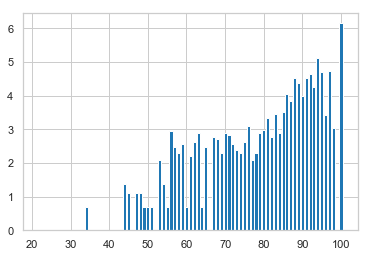

In [1219]:
plt.bar(matches_knn.groupby('tstr1s').Messy_addr.count().index, np.log(matches_knn.groupby('tstr1s').Messy_addr.count().values))

In [1220]:
print('Match_confidence Max:', matches_knn.Match_confidence_lowerisbetter.max())
print('Match_confidence Min:', matches_knn.Match_confidence_lowerisbetter.min())
print('Match_confidence Mean:', matches_knn.Match_confidence_lowerisbetter.mean())
print('Match_confidence Median:', matches_knn.Match_confidence_lowerisbetter.median())

print('Fuzzywuzzy token_set_ratio Max:', matches_knn.tstr1s.max())
print('Fuzzywuzzy token_set_ratio Min:', matches_knn.tstr1s.min())
print('Fuzzywuzzy token_set_ratio Mean:', matches_knn.tstr1s.mean())
print('Fuzzywuzzy token_set_ratio Median:', matches_knn.tstr1s.median())

Match_confidence Max: 1.27
Match_confidence Min: 0.0
Match_confidence Mean: 0.6676200000000009
Match_confidence Median: 0.69
Fuzzywuzzy token_set_ratio Max: 100
Fuzzywuzzy token_set_ratio Min: 22
Fuzzywuzzy token_set_ratio Mean: 88.7685
Fuzzywuzzy token_set_ratio Median: 92.0


<BarContainer object of 24 artists>

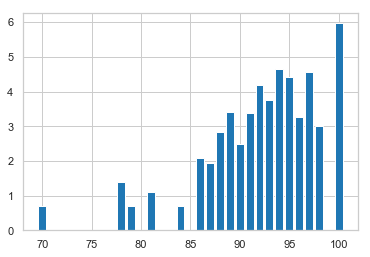

In [1221]:
plt.bar(matches_knn[matches_knn.Match_confidence_lowerisbetter<=0.67].groupby('tstr1s').Messy_addr.count().index, np.log(matches_knn[matches_knn.Match_confidence_lowerisbetter<=0.67].groupby('tstr1s').Messy_addr.count().values))

### Run ING fast match to the same sampled data set.  Plot Fuzzywuzzy ratio to verify the match result 

In [1222]:
tt1 = time.time()
print('ING program started...')
matches_dff_s = run_ING_match (ds_m_d6, ds_e_d6_s, top_N, similarity)
tt2 = time.time() - tt1
print('ING program completed.  Time used: ', tt2)

ING program started...
building tf-idf vector n...
Time used: 0.47540712356567383
awesome_cossim_top n...
Time used: 0.34526681900024414
getting matches_df n...
Time used: 0.006016731262207031
Total time consumed: 0.8277065753936768
r1s match (%>90) =  0.492
pr1s match (%>90) =  0.4875
tsr1s match (%>90) =  0.4555
tstr1s match (%>90) =  0.592

ING program completed.  Time used:  1.2478554248809814


In [1223]:
print('Similarity Max:', matches_dff_s.Similarity.max())
print('Similarity Min:', matches_dff_s.Similarity.min())
print('Similarity Median:', matches_dff_s.Similarity.median())

print('Fuzzywuzzy token_set_ratio Max:', matches_dff_s.tstr1s.max())
print('Fuzzywuzzy token_set_ratio Min:', matches_dff_s.tstr1s.min())
print('Fuzzywuzzy token_set_ratio Median:', matches_dff_s.tstr1s.median())

Similarity Max: 1.0000000000000004
Similarity Min: 0.193619958443217
Similarity Median: 0.7615683988465212
Fuzzywuzzy token_set_ratio Max: 100
Fuzzywuzzy token_set_ratio Min: 22
Fuzzywuzzy token_set_ratio Median: 92.0


<BarContainer object of 63 artists>

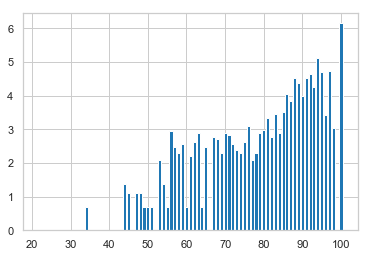

In [1224]:
plt.bar(matches_dff_s.groupby('tstr1s').Messy_addr.count().index, np.log(matches_dff_s.groupby('tstr1s').Messy_addr.count().values))

<BarContainer object of 26 artists>

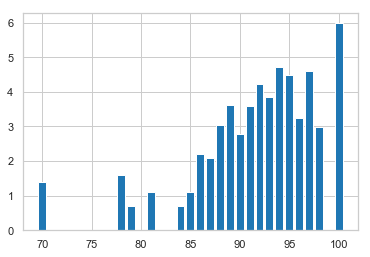

In [1225]:
plt.bar(matches_dff_s[matches_dff_s.Similarity>=0.76].groupby('tstr1s').Messy_addr.count().index, np.log(matches_dff_s[matches_dff_s.Similarity>=0.76].groupby('tstr1s').Messy_addr.count().values))

### Bar plot of Fuzyywuzzy ratio of two algorithm return the same statistics.  But KNN cannot perform if increase the size of data set due to memory restrict

### Apply ING fast match to large data set - one division

In [1226]:
tt1 = time.time()
print('ING program started...')
matches_dff = run_ING_match (ds_m_d6, ds_e_d6_simple, top_N, similarity)
tt2 = time.time() - tt1
print('ING program completed.  Time used: ', tt2)

ING program started...
building tf-idf vector n...
Time used: 0.587061882019043
awesome_cossim_top n...
Time used: 1.5676662921905518
getting matches_df n...
Time used: 0.016580581665039062
Total time consumed: 2.172792911529541
r1s match (%>90) =  0.5670888913798902
pr1s match (%>90) =  0.5348055150767851
tsr1s match (%>90) =  0.5246048649254568
tstr1s match (%>90) =  0.6196614729290438

ING program completed.  Time used:  3.764163017272949


In [1227]:
print('Similarity Max:', matches_dff.Similarity.max())
print('Similarity Min:', matches_dff.Similarity.min())
print('Similarity Median:', matches_dff.Similarity.median())
print()
print('Fuzzywuzzy token_set_ratio Max:', matches_dff.tstr1s.max())
print('Fuzzywuzzy token_set_ratio Min:', matches_dff.tstr1s.min())
print('Fuzzywuzzy token_set_ratio Median:', matches_dff.tstr1s.mean())


import scipy.stats as st

print('Fuzzywuzzy token_set_ratio 95% interval:',st.t.interval(0.95, len(matches_dff.tstr1s)-1, loc=np.mean(matches_dff.tstr1s), scale=st.sem(matches_dff.tstr1s)))

Similarity Max: 1.0000000000000004
Similarity Min: 0.193619958443217
Similarity Median: 0.7747662469392997

Fuzzywuzzy token_set_ratio Max: 100
Fuzzywuzzy token_set_ratio Min: 31
Fuzzywuzzy token_set_ratio Median: 89.16859096513843
Fuzzywuzzy token_set_ratio 95% interval: (88.924349191036, 89.41283273924087)


In [1228]:
df_exception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525887 entries, 0 to 530436
Data columns (total 12 columns):
DATAID            525887 non-null object
M_TXT             525887 non-null object
M_DIV_CD          525887 non-null object
M_ADDR            525887 non-null object
M_CITY            525887 non-null object
M_ADDR_TYPE       525887 non-null object
M_ADDR_c          525887 non-null object
M_TXT_c           525887 non-null object
M_ADDR_n          525887 non-null object
ADDR_isnumeric    525887 non-null bool
M_ADDR_s          525887 non-null object
M_TXT_s           525887 non-null object
dtypes: bool(1), object(11)
memory usage: 48.6+ MB


In [1229]:
#df_exception[df_exception.M_DIV_CD=='d6'].groupby(['M_ADDR_s','M_CITY']).size().reset_index(name='CNT').M_ADDR_s.unique()

In [1230]:
#df_exception[df_exception.M_DIV_CD=='d6']['M_ADDR_s'].unique()

In [1231]:
len(matches_dff[matches_dff.tstr1s==100])/len(matches_dff)

0.1996412958188544

In [1232]:
matches_dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921 entries, 0 to 8920
Data columns (total 7 columns):
Messy_addr     8921 non-null object
Master_addr    8921 non-null object
Similarity     8921 non-null float64
pr1s           8921 non-null int64
tsr1s          8921 non-null int64
tstr1s         8921 non-null int64
r1s            8921 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 487.9+ KB


In [1233]:
len(matches_dff.Messy_addr.unique())

8921

<BarContainer object of 66 artists>

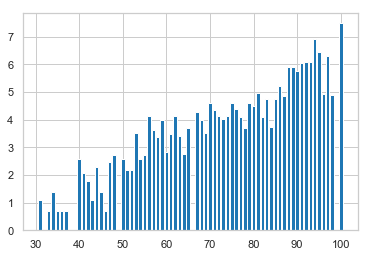

In [1234]:
plt.bar(matches_dff.groupby('tstr1s').Messy_addr.count().index, np.log(matches_dff.groupby('tstr1s').Messy_addr.count().values))

In [1235]:
def get_div_match (div_cd, master_feature, messy_feature):

    print()
    print('Matching for div ', div_cd, ' started...')

    t1 = time.time()

    ds_master = df_master[df_master.P_DIV_CD==div_cd][master_feature].unique()
    ds_messy = df_exception[df_exception.M_DIV_CD==div_cd][messy_feature].unique()


    top_N = 1
    similarity = 0
    matches_T1 = run_ING_match (ds_master, ds_messy, top_N, similarity)

    t = time.time() - t1
    print('Top 1 completed in ', t)

    top_N = 2
    similarity = 0

    ds_seed_T2 = matches_T1[matches_T1.tstr1s==100].Messy_addr.unique()
    matches_T2 = run_ING_match_N (ds_master, ds_seed_T2, top_N, similarity)

    df_2_tmp = matches_T2[matches_T2.tstr1s==100]
    df_1_tmp = matches_T1[matches_T1.tstr1s==100]

    df_T2notinT1 = df_2_tmp[~(df_2_tmp['Messy_addr'].isin(df_1_tmp['Messy_addr']) & df_2_tmp['Master_addr'].isin(df_1_tmp['Master_addr']))].reset_index(drop=True)

    top_N = 100
    similarity = 0

    ds_seed_T100 = df_T2notinT1.Messy_addr.unique()#df_T2notinT1[df_T2notinT1.tstr1s==100].Messy_addr.unique()
    matches_T100 = run_ING_match_N (ds_master, ds_seed_T100, top_N, similarity)

    df_3_tmp = matches_T100[matches_T100.tstr1s==100]    
    df_T100notinT1 = df_3_tmp[~(df_3_tmp['Messy_addr'].isin(df_1_tmp['Messy_addr']) & df_3_tmp['Master_addr'].isin(df_1_tmp['Master_addr']))].reset_index(drop=True)

    t = time.time() - t1
    print('All completed in ', t)
    
    matches_T1['M_DIV_CD']= div_cd
    df_T100notinT1['M_DIV_CD']= div_cd
    df_T2notinT1['M_DIV_CD']= div_cd

    return matches_T1, df_T100notinT1, df_T2notinT1#, df_3_tmp, 

In [1236]:
master_feature='P_ADDR_s'
messy_feature='M_ADDR_s'
div_cd = 'd6'

m_t1, m_tn, m_tn_seed = get_div_match (div_cd, master_feature, messy_feature)
print('size of m_t1:', len(m_t1))  
print('size of m_tn:', len(m_tn))
print('size of m_tn_seed:', len(m_tn_seed))


Matching for div  d6  started...
building tf-idf vector n...
Time used: 0.5820486545562744
awesome_cossim_top n...
Time used: 2.1007251739501953
getting matches_df n...
Time used: 0.02306056022644043
Total time consumed: 2.7088429927825928
r1s match (%>90) =  0.4986513823331086
pr1s match (%>90) =  0.48238368172623064
tsr1s match (%>90) =  0.45220836142953474
tstr1s match (%>90) =  0.5840357383681726

Top 1 completed in  5.0486907958984375
Top 2 and 100 Completed in: 1.7832276821136475
Top 2 and 100 Completed in: 7.826847553253174
All completed in  14.683845043182373
size of m_t1: 11864
size of m_tn: 9623
size of m_tn_seed: 430


In [1237]:
m_tns[m_tns.M_DIV_CD=='d5'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8604 entries, 0 to 8603
Data columns (total 8 columns):
Messy_addr     8604 non-null object
Master_addr    8604 non-null object
Similarity     8604 non-null float64
pr1s           8604 non-null int64
tsr1s          8604 non-null int64
tstr1s         8604 non-null int64
r1s            8604 non-null int64
M_DIV_CD       8604 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 605.0+ KB


In [1238]:
#m_tn[(m_tn['Messy_addr'].isin(m_t1[m_t1.tstr1s==100]['Messy_addr']) & m_tn['Master_addr'].isin(m_t1[m_t1.tstr1s==100]['Master_addr']))]

In [1239]:
#m_tn[(m_tn['Messy_addr'].isin(m_t1['Messy_addr']) & m_tn['Master_addr'].isin(m_t1['Master_addr']))].head()

### Scale to large data set

#### Run1 to all without break down to division 

In [1242]:
ds_e = df_exception.M_ADDR_s.unique()
ds_m = df_master.P_ADDR_s.unique()

matches_all = run_ING_match (ds_m, ds_e, top_N, similarity)

building tf-idf vector n...
Time used: 16.1040678024292
awesome_cossim_top n...
Time used: 3756.5679426193237
getting matches_df n...
Time used: 1.1045677661895752
Total time consumed: 3773.7916209697723
r1s match (%>90) =  0.5065046372501164
pr1s match (%>90) =  0.526466948950517
tsr1s match (%>90) =  0.42622685631903373
tstr1s match (%>90) =  0.5728933716270674



In [1243]:
matches_all_r1 = matches_all.copy()

In [1244]:
len(ds_e), len(ds_m), len(df_master.P_ADDR_s)

(352364, 500919, 505761)

In [1245]:
matches_all_r1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352364 entries, 0 to 352363
Data columns (total 7 columns):
Messy_addr     352364 non-null object
Master_addr    352364 non-null object
Similarity     352364 non-null float64
pr1s           352364 non-null int64
tsr1s          352364 non-null int64
tstr1s         352364 non-null int64
r1s            352364 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 18.8+ MB


#### Run 2 run program for each division.  

Breaking large data set into smaller trunck; Bring in division as an additional feature 

In [1246]:
df_exception.M_DIV_CD.unique()

array(['d2', 'd1', 'd7', 'd4', 'd3', 'd5', 'd6'], dtype=object)

In [1247]:
master_feature='P_ADDR_s'
messy_feature='M_ADDR_s'

div_list = ['d1', 'd2', 'd3', 'd4', 'd5', 'd6']#df_exception.M_DIV_CD.unique()

m_t1s = pd.DataFrame()
m_tns = pd.DataFrame()
m_tn_seeds = pd.DataFrame()

t_started = time.time()
print('The program started ...')

for div_cd in div_list:

    m_t1, m_tn, m_tn_seed = get_div_match (div_cd, master_feature, messy_feature)
    m_t1s = m_t1s.append(m_t1)
    m_tns = m_tns.append(m_tn)
    m_tn_seeds = m_tn_seeds.append(m_tn_seed)

t_used = time.time()- t_started
print('The run completed in:', t_used)
print('size of m_t1s:', len(m_t1s))  
print('size of m_tns:', len(m_tns))
print('size of m_tn_seeds:', len(m_tn_seeds))

The program started ...

Matching for div  d1  started...
building tf-idf vector n...
Time used: 2.142190933227539
awesome_cossim_top n...
Time used: 20.321574211120605
getting matches_df n...
Time used: 0.0822153091430664
Total time consumed: 22.54848837852478
r1s match (%>90) =  0.46165827941528875
pr1s match (%>90) =  0.47752216630721306
tsr1s match (%>90) =  0.41363527438293796
tstr1s match (%>90) =  0.5331176611550443

Top 1 completed in  30.677200317382812
Top 2 and 100 Completed in: 11.112823724746704
Top 2 and 100 Completed in: 22.027884483337402
All completed in  63.88233661651611

Matching for div  d2  started...
building tf-idf vector n...
Time used: 8.41646146774292
awesome_cossim_top n...
Time used: 703.5318794250488
getting matches_df n...
Time used: 0.4020833969116211
Total time consumed: 712.3524167537689
r1s match (%>90) =  0.5485644970345186
pr1s match (%>90) =  0.549182670157984
tsr1s match (%>90) =  0.44739405037527774
tstr1s match (%>90) =  0.6008817714742263

Top 

In [1248]:
print('size of m_t1s:', len(m_t1s))  
print('size of m_tns:', len(m_tns))
print('size of m_tn_seeds:', len(m_tn_seeds))

size of m_t1s: 317149
size of m_tns: 86395
size of m_tn_seeds: 5959


In [1249]:
print('Similarity Max:', matches_all.Similarity.max())
print('Similarity Min:', matches_all.Similarity.min())
print('Similarity Mean:', matches_all.Similarity.mean())
print('Similarity Median:', matches_all.Similarity.median())

print('Fuzzywuzzy token_set_ratio Max:', matches_all.tstr1s.max())
print('Fuzzywuzzy token_set_ratio Min:', matches_all.tstr1s.min())
print('Fuzzywuzzy token_set_ratio Mean:', matches_all.tstr1s.mean())
print('Fuzzywuzzy token_set_ratio Median:', matches_all.tstr1s.median())

Similarity Max: 1.0000000000000007
Similarity Min: 0.20264296648059807
Similarity Mean: 0.7664397916141261
Similarity Median: 0.7850021685579134
Fuzzywuzzy token_set_ratio Max: 100
Fuzzywuzzy token_set_ratio Min: 14
Fuzzywuzzy token_set_ratio Mean: 89.09729995118684
Fuzzywuzzy token_set_ratio Median: 92.0


In [1250]:
matches_all = m_t1s.copy()

In [1251]:
matches_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317149 entries, 0 to 11863
Data columns (total 8 columns):
Messy_addr     317149 non-null object
Master_addr    317149 non-null object
Similarity     317149 non-null float64
pr1s           317149 non-null int64
tsr1s          317149 non-null int64
tstr1s         317149 non-null int64
r1s            317149 non-null int64
M_DIV_CD       317149 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 21.8+ MB


In [4]:
#matches_all[(matches_all.tstr1s==100) & (matches_all.Similarity> 0.80)].head()

In [3]:
#matches_all[ (matches_all.Similarity==1)].head()

In [1254]:
ana_m_tns = m_tns[m_tns.tstr1s==100].groupby('Messy_addr').count()
len(ana_m_tns[ana_m_tns.Master_addr==100])

1

Text(25.0, 0.5, 'Similarity')

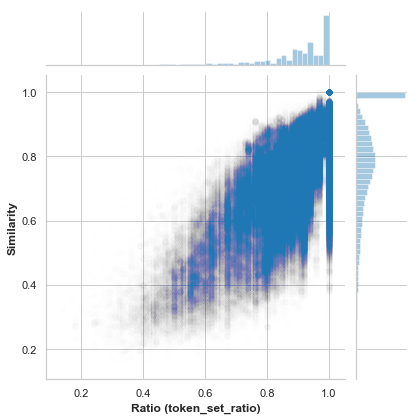

In [1255]:
yy = matches_all.Similarity
xx = matches_all.tstr1s/100

#_=plt.scatter(x, y)
h = sns.jointplot(x=xx, y=yy, alpha=0.005);
h.ax_joint.set_xlabel('Ratio (token_set_ratio)', fontweight='bold')
h.ax_joint.set_ylabel('Similarity', fontweight='bold')

#plt.tight_layout()

In [2]:
#matches_all[(matches_all.Similarity>0.5) & (matches_all.tstr1s==100)].head()

<BarContainer object of 85 artists>

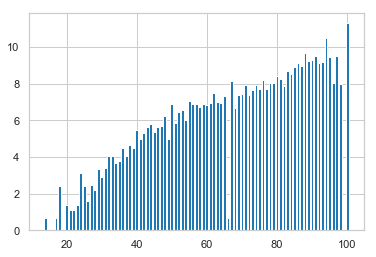

In [1257]:
plt.bar(matches_all.groupby('tstr1s').Messy_addr.count().index, np.log(matches_all.groupby('tstr1s').Messy_addr.count().values))

In [1258]:
matches_all['Similarity_r']=np.round(matches_all.Similarity, 2)

In [1259]:
matches_all.Similarity_r.head()

0    0.90
1    0.89
2    0.86
3    0.93
4    0.90
Name: Similarity_r, dtype: float64

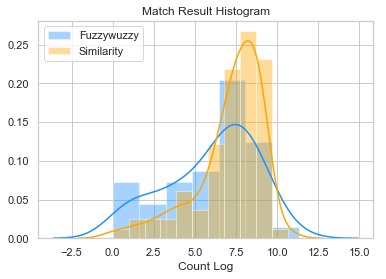

In [1260]:
#plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( np.log(matches_all.groupby('tstr1s').Messy_addr.count().values) , color="dodgerblue", label="Fuzzywuzzy")
sns.distplot( np.log(matches_all.groupby('Similarity_r').Messy_addr.count().values) , color="orange", label="Similarity")

plt.xlabel('Count Log')
plt.title('Match Result Histogram')
plt.legend();

In [1261]:
len(matches_all[matches_all.tstr1s==100])/len(matches_all)

0.25596170884978353

In [1262]:
matches_all[matches_all.tstr1s==100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81178 entries, 1 to 11863
Data columns (total 9 columns):
Messy_addr      81178 non-null object
Master_addr     81178 non-null object
Similarity      81178 non-null float64
pr1s            81178 non-null int64
tsr1s           81178 non-null int64
tstr1s          81178 non-null int64
r1s             81178 non-null int64
M_DIV_CD        81178 non-null object
Similarity_r    81178 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 6.2+ MB


In [1263]:
len(matches_all[matches_all.tstr1s==100].Master_addr.unique())

69478

In [1]:
#matches_all[(matches_all.tstr1s>97) & (matches_all.r1s>75)].head()

In [1265]:
df_export_top1 = pd.merge(df_exception, m_t1s, how='left', left_on=['M_ADDR_s','M_DIV_CD'], right_on=['Messy_addr','M_DIV_CD'])

In [1266]:
df_export_top1.to_csv('DLP_Matched_Addr_top1.csv')

In [1267]:
df_export_multiple = pd.merge(df_exception, m_tns, how='inner', left_on=['M_ADDR_s','M_DIV_CD'], right_on=['Messy_addr','M_DIV_CD'])

In [1269]:
m_tns.to_csv('DLP_Matched_Addr_multiple_raw.csv')
df_export_multiple.to_csv('DLP_Matched_Addr_multiple.csv')

In [1271]:
df_master.to_csv('DLP_Master_cleansed.csv')

###  Conclusion: As we saw, three methods are quite good for matching strings even data is dirty. The biggest challenge however, is the speed. Fuzzywuzzy and KNN are working fine with small data set but will require more on hardware and memory to scale to large data set. ING algorithm shows the biggest advantage on speed.  With ING implemented above, I have a program which is able to match over 300k addresses against another over half million master data set in 20 minutes, the program includes top 1 match, top2 and top 100 match for seeded data.